In [95]:
cd /Users/eduardodaroza/intro_dsi/capstone/Capstone/games/

/Users/eduardodaroza/intro_dsi/capstone/Capstone/games


In [8]:
import pandas as pd

In [9]:
import networkx as nx

# tag names specifying what game info should be
# stored in the dict on each digraph edge
game_details=["Event",
              "Date",
              "Result",
              "ECO",
              "Site"]

def chess_pgn_graph(pgn_file="example.pgn"):
    """Read chess games in pgn format in pgn_file.

    Filenames ending in .gz or .bz2 will be uncompressed.

    Return the MultiDiGraph of players connected by a chess game.
    Edges contain game data in a dict.

    """
    G=nx.MultiDiGraph()
    game={}
    datafile = open(pgn_file)
    lines = (line.decode().rstrip('\r\n') for line in datafile)
    for line in lines:
        if line.startswith('['):
            tag,value=line[1:-1].split(' ',1)
            game[str(tag)]=value.strip('"')
        else:
        # empty line after tag set indicates
        # we finished reading game info
            if game:
                white=game.pop('White')
                black=game.pop('Black')
                G.add_edge(white, black, **game)
                game={}
    return G


if __name__ == '__main__':
    import networkx as nx


    G=chess_pgn_graph()

    ngames=G.number_of_edges()
    nplayers=G.number_of_nodes()

    print("Loaded %d chess games between %d players\n"\
                   % (ngames,nplayers))

    # identify connected components
    # of the undirected version
    Gcc=nx.connected_component_subgraphs(G.to_undirected())
    if len(Gcc)>1:
        print("Note the disconnected component consisting of:")
        print(Gcc[1].nodes())

    # find all games with B97 opening (as described in ECO)
    openings=set([game_info['ECO']
                  for (white,black,game_info) in G.edges(data=True)])
    print("\nFrom a total of %d different openings,"%len(openings))
    print('the following games used the Sicilian opening')
    print('with the Najdorff 7...Qb6 "Poisoned Pawn" variation.\n')

    for (white,black,game_info) in G.edges(data=True):
        if game_info['ECO']=='B97':
           print(white,"vs",black)
           for k,v in game_info.items():
               print("   ",k,": ",v)
           print("\n")


    try:
        import matplotlib.pyplot as plt
    except ImportError:
        import sys
        print("Matplotlib needed for drawing. Skipping")
        sys.exit(0)

    # make new undirected graph H without multi-edges
    H=nx.Graph(G)

    # edge width is proportional number of games played
    edgewidth=[]
    for (u,v,d) in H.edges(data=True):
        edgewidth.append(len(G.get_edge_data(u,v)))

    # node size is proportional to number of games won
    wins=dict.fromkeys(G.nodes(),0.0)
    for (u,v,d) in G.edges(data=True):
        r=d['Result'].split('-')
        if r[0]=='1':
            wins[u]+=1.0
        elif r[0]=='1/2':
            wins[u]+=0.5
            wins[v]+=0.5
        else:
            wins[v]+=1.0
    try:
        pos=nx.graphviz_layout(H)
    except:
        pos=nx.spring_layout(H,iterations=20)

    plt.rcParams['text.usetex'] = False
    plt.figure(figsize=(8,8))
    nx.draw_networkx_edges(H,pos,alpha=0.3,width=edgewidth, edge_color='m')
    nodesize=[wins[v]*50 for v in H]
    nx.draw_networkx_nodes(H,pos,node_size=nodesize,node_color='w',alpha=0.4)
    nx.draw_networkx_edges(H,pos,alpha=0.4,node_size=0,width=1,edge_color='k')
    nx.draw_networkx_labels(H,pos,fontsize=14)
    font = {'fontname'   : 'Helvetica',
            'color'      : 'k',
            'fontweight' : 'bold',
            'fontsize'   : 14}
    plt.title("World Chess Championship Games: 1886 - 1985", font)

    # change font and write text (using data coordinates)
    font = {'fontname'   : 'Helvetica',
    'color'      : 'r',
    'fontweight' : 'bold',
    'fontsize'   : 14}

    plt.text(0.5, 0.97, "edge width = # games played",
             horizontalalignment='center',
             transform=plt.gca().transAxes)
    plt.text(0.5, 0.94,  "node size = # games won",
             horizontalalignment='center',
             transform=plt.gca().transAxes)

    plt.axis('off')
    plt.savefig("chess_masters.png",dpi=75)
    print("Wrote chess_masters.png")
    plt.show() # display


Loaded 1 chess games between 2 players



TypeError: object of type 'generator' has no len()

In [48]:
import json

In [55]:
#df = pd.DataFrame.from_dict(game, orient='index')

In [56]:
df.T

,Site,Round,Black,Result,Date,White,Moves,Event
0,"Belgrade, Serbia JUG",29,"Spassky, Boris V.",1/2-1/2,1992.11.04,"Fischer, Robert J.",Nf2 42. g4 Bd3 43. Re6 1/2-1/2,F/S Return Match


Working: this code opens a pgn file and converts it to a json where the meta data and first 8 moves of the game are stored as a dictionary in a list of games

In [111]:
game={}
games = []
#print type(games)
pgn_file="twic1148.pgn"
# datafile = open(pgn_file)
# datafile.close()
with open(pgn_file,'r') as datafile:
#    line = (line.decode().rstrip('\r\n') for line in datafile)
#    print lines.next
#    print lines.next
    for line in datafile:
        line = line.decode().rstrip('\r\n') 
        #    for line in lines:
        if line.startswith('['):
            tag,value=line[1:-1].split(' ',1)
            game[str(tag).lower()]=value.replace("]","").strip('"').encode('ascii', 'ignore')
        elif line.startswith('1.'):
            #only read first line: could add more readlines until a space
            game['moves']=line.encode('ascii', 'ignore')
            games.append(game)
            game = {}
            #print game
        #else:
            
#        elif line.startswith('1.'):
#            # read remaining lines of game
#            game['Moves']=line.encode('ascii', 'ignore')
#            #break
#            games.append(game)

    

In [112]:
len(games)

1828

In [113]:
test = pd.DataFrame(games)  

In [114]:
test.head()

,black,blackelo,blackfideid,blackteam,blacktitle,date,eco,event,eventdate,eventtype,...,opening,result,round,site,variation,white,whiteelo,whitefideid,whiteteam,whitetitle
0,"Grischuk,A",2751,4126025,Syberia,GM,2016.11.06,B90,32nd ECC Open 2016,2016.11.06,NaN,...,Sicilian,1/2-1/2,1.1,Novi Sad SRB,"Najdorf, Adams attack","Getz,N",2434,1505572,Oslo Schakselskap,IM
1,"Hauge,Lars Oskar",2415,1509276,Oslo Schakselskap,IM,2016.11.06,E90,32nd ECC Open 2016,2016.11.06,NaN,...,King's Indian,1/2-1/2,1.1,Novi Sad SRB,5.Nf3,"Tomashevsky,E",2722,4147235,Syberia,GM
2,Li Chao2,2730,8604436,Syberia,GM,2016.11.06,A84,32nd ECC Open 2016,2016.11.06,NaN,...,"Dutch defence, Rubinstein variation",0-1,1.1,Novi Sad SRB,NaN,"Mihajlov,Seb",2359,1512110,Oslo Schakselskap,FM
3,"Kovachev,D",2309,1503448,Oslo Schakselskap,FM,2016.11.06,D51,32nd ECC Open 2016,2016.11.06,NaN,...,QGD,1-0,1.1,Novi Sad SRB,NaN,"Korobov,A",2689,14105730,Syberia,GM
4,"Rublevsky,S",2689,4115309,Syberia,GM,2016.11.06,D02,32nd ECC Open 2016,2016.11.06,NaN,...,Queen's pawn game,0-1,1.1,Novi Sad SRB,NaN,"Persson,Mat2",2314,1708333,Oslo Schakselskap,FM


In [115]:
# f = open('twic1148.pgn')
# for line in f:
#     print line
# f.close()

In [116]:
garbage = test.pop('blackteam')
garbage = test.pop('blacktitle')
garbage = test.pop('whiteteam')
garbage = test.pop('whitetitle')
garbage = test.pop('eventdate')
garbage = test.pop('eventtype')
garbage = test.pop('site')
garbage = test.pop('variation')
garbage = test.pop('eco') # most precise drop for now in first dumb model
garbage = test.pop('blackfideid')
garbage = test.pop('whitefideid')
garbage = test.pop('event') 
garbage = test.pop('round') # may have alot of variance, drop for now
#garbage = data_df.pop('opening') # second most precise drop for now in first dumb model

In [117]:
test.head()

,black,blackelo,date,moves,opening,result,white,whiteelo
0,"Grischuk,A",2751,2016.11.06,1. e4 c5 2. Nf3 d6 3. d4 cxd4 4. Nxd4 Nf6 5. N...,Sicilian,1/2-1/2,"Getz,N",2434
1,"Hauge,Lars Oskar",2415,2016.11.06,1. Nf3 Nf6 2. c4 g6 3. Nc3 Bg7 4. e4 d6 5. d4 ...,King's Indian,1/2-1/2,"Tomashevsky,E",2722
2,Li Chao2,2730,2016.11.06,1. d4 e6 2. c4 f5 3. Nc3 Nf6 4. e3 Be7 5. Bd3 ...,"Dutch defence, Rubinstein variation",0-1,"Mihajlov,Seb",2359
3,"Kovachev,D",2309,2016.11.06,1. d4 Nf6 2. c4 e6 3. Nc3 d5 4. Bg5 Nbd7 5. e3...,QGD,1-0,"Korobov,A",2689
4,"Rublevsky,S",2689,2016.11.06,1. d4 d5 2. Nf3 Nf6 3. g3 Bg4 4. Bg2 e6 5. O-O...,Queen's pawn game,0-1,"Persson,Mat2",2314


In [128]:
test.date = map(lambda x: str(x).replace(".",""),test.date)

In [129]:
test.head()

,black,blackelo,date,moves,opening,result,white,whiteelo
0,"Grischuk,A",2751,20161106,1. e4 c5 2. Nf3 d6 3. d4 cxd4 4. Nxd4 Nf6 5. N...,Sicilian,1/2-1/2,"Getz,N",2434
1,"Hauge,Lars Oskar",2415,20161106,1. Nf3 Nf6 2. c4 g6 3. Nc3 Bg7 4. e4 d6 5. d4 ...,King's Indian,1/2-1/2,"Tomashevsky,E",2722
2,Li Chao2,2730,20161106,1. d4 e6 2. c4 f5 3. Nc3 Nf6 4. e3 Be7 5. Bd3 ...,"Dutch defence, Rubinstein variation",0-1,"Mihajlov,Seb",2359
3,"Kovachev,D",2309,20161106,1. d4 Nf6 2. c4 e6 3. Nc3 d5 4. Bg5 Nbd7 5. e3...,QGD,1-0,"Korobov,A",2689
4,"Rublevsky,S",2689,20161106,1. d4 d5 2. Nf3 Nf6 3. g3 Bg4 4. Bg2 e6 5. O-O...,Queen's pawn game,0-1,"Persson,Mat2",2314


In [131]:
test.date = pd.to_datetime(test.date, format='%Y%m%d', errors='ignore')

In [133]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1828 entries, 0 to 1827
Data columns (total 8 columns):
black       1828 non-null object
blackelo    1812 non-null object
date        1828 non-null datetime64[ns]
moves       1828 non-null object
opening     1821 non-null object
result      1828 non-null object
white       1828 non-null object
whiteelo    1815 non-null object
dtypes: datetime64[ns](1), object(7)
memory usage: 114.3+ KB


In [134]:
import datetime as DT
import io
import numpy as np

In [135]:
now = pd.Timestamp(DT.datetime.now())
test['age'] = (now - test['date']).astype('timedelta64[D]') 

In [136]:
test.head()

,black,blackelo,date,moves,opening,result,white,whiteelo,age
0,"Grischuk,A",2751,2016-11-06,1. e4 c5 2. Nf3 d6 3. d4 cxd4 4. Nxd4 Nf6 5. N...,Sicilian,1/2-1/2,"Getz,N",2434,8.0
1,"Hauge,Lars Oskar",2415,2016-11-06,1. Nf3 Nf6 2. c4 g6 3. Nc3 Bg7 4. e4 d6 5. d4 ...,King's Indian,1/2-1/2,"Tomashevsky,E",2722,8.0
2,Li Chao2,2730,2016-11-06,1. d4 e6 2. c4 f5 3. Nc3 Nf6 4. e3 Be7 5. Bd3 ...,"Dutch defence, Rubinstein variation",0-1,"Mihajlov,Seb",2359,8.0
3,"Kovachev,D",2309,2016-11-06,1. d4 Nf6 2. c4 e6 3. Nc3 d5 4. Bg5 Nbd7 5. e3...,QGD,1-0,"Korobov,A",2689,8.0
4,"Rublevsky,S",2689,2016-11-06,1. d4 d5 2. Nf3 Nf6 3. g3 Bg4 4. Bg2 e6 5. O-O...,Queen's pawn game,0-1,"Persson,Mat2",2314,8.0


In [137]:
d = {
    '0-1':-1.0,
    '1-0':1.0,
    '1/2-1/2':0.0
    }
test['result'] = test['result'].map(d)

In [140]:
test.head()

,black,blackelo,date,moves,opening,result,white,whiteelo,age
0,"Grischuk,A",2751,2016-11-06,1. e4 c5 2. Nf3 d6 3. d4 cxd4 4. Nxd4 Nf6 5. N...,Sicilian,0.0,"Getz,N",2434,8.0
1,"Hauge,Lars Oskar",2415,2016-11-06,1. Nf3 Nf6 2. c4 g6 3. Nc3 Bg7 4. e4 d6 5. d4 ...,King's Indian,0.0,"Tomashevsky,E",2722,8.0
2,Li Chao2,2730,2016-11-06,1. d4 e6 2. c4 f5 3. Nc3 Nf6 4. e3 Be7 5. Bd3 ...,"Dutch defence, Rubinstein variation",-1.0,"Mihajlov,Seb",2359,8.0
3,"Kovachev,D",2309,2016-11-06,1. d4 Nf6 2. c4 e6 3. Nc3 d5 4. Bg5 Nbd7 5. e3...,QGD,1.0,"Korobov,A",2689,8.0
4,"Rublevsky,S",2689,2016-11-06,1. d4 d5 2. Nf3 Nf6 3. g3 Bg4 4. Bg2 e6 5. O-O...,Queen's pawn game,-1.0,"Persson,Mat2",2314,8.0


In [ ]:
#target engineering

In [159]:
test['white_first_move'] = test.moves.apply(lambda x: x.split(" ")).apply(lambda x: x[1])

In [161]:
test['black_first_move'] = test.moves.apply(lambda x: x.split(" ")).apply(lambda x: x[2])

In [162]:
test.head()

,black,blackelo,date,moves,opening,result,white,whiteelo,age,white_first_move,black_first_move
0,"Grischuk,A",2751,2016-11-06,1. e4 c5 2. Nf3 d6 3. d4 cxd4 4. Nxd4 Nf6 5. N...,Sicilian,0.0,"Getz,N",2434,8.0,e4,c5
1,"Hauge,Lars Oskar",2415,2016-11-06,1. Nf3 Nf6 2. c4 g6 3. Nc3 Bg7 4. e4 d6 5. d4 ...,King's Indian,0.0,"Tomashevsky,E",2722,8.0,Nf3,Nf6
2,Li Chao2,2730,2016-11-06,1. d4 e6 2. c4 f5 3. Nc3 Nf6 4. e3 Be7 5. Bd3 ...,"Dutch defence, Rubinstein variation",-1.0,"Mihajlov,Seb",2359,8.0,d4,e6
3,"Kovachev,D",2309,2016-11-06,1. d4 Nf6 2. c4 e6 3. Nc3 d5 4. Bg5 Nbd7 5. e3...,QGD,1.0,"Korobov,A",2689,8.0,d4,Nf6
4,"Rublevsky,S",2689,2016-11-06,1. d4 d5 2. Nf3 Nf6 3. g3 Bg4 4. Bg2 e6 5. O-O...,Queen's pawn game,-1.0,"Persson,Mat2",2314,8.0,d4,d5


In [179]:
test['counter'] = 1

frequency by opening and white player

In [184]:
test.groupby(['opening','white']).size()/test.groupby('white').size()

opening                                        white                   
Alekhine's defence                             Azarov,S                    0.250000
                                               Bouwens,Harko               0.250000
                                               Cvetanovic,U                1.000000
                                               Den Hartog,Marijn           1.000000
                                               Ganguly,S                   1.000000
                                               Groetz,H                    0.250000
                                               Lindberg,H                  1.000000
                                               Martinez de Negri,G         1.000000
                                               Mitra,Akash                 0.250000
                                               Nguyen,Kevin                1.000000
                                               Osmanodja,B                 0.333333
    

In [234]:
test.groupby(['opening']).size().head()

opening
Alekhine's defence            13
Benko gambit                   5
Benko gambit accepted          3
Benko gambit half accepted     4
Benko's opening                7
dtype: int64

In [187]:
from matplotlib import pyplot as plt 

In [189]:
%matplotlib inline

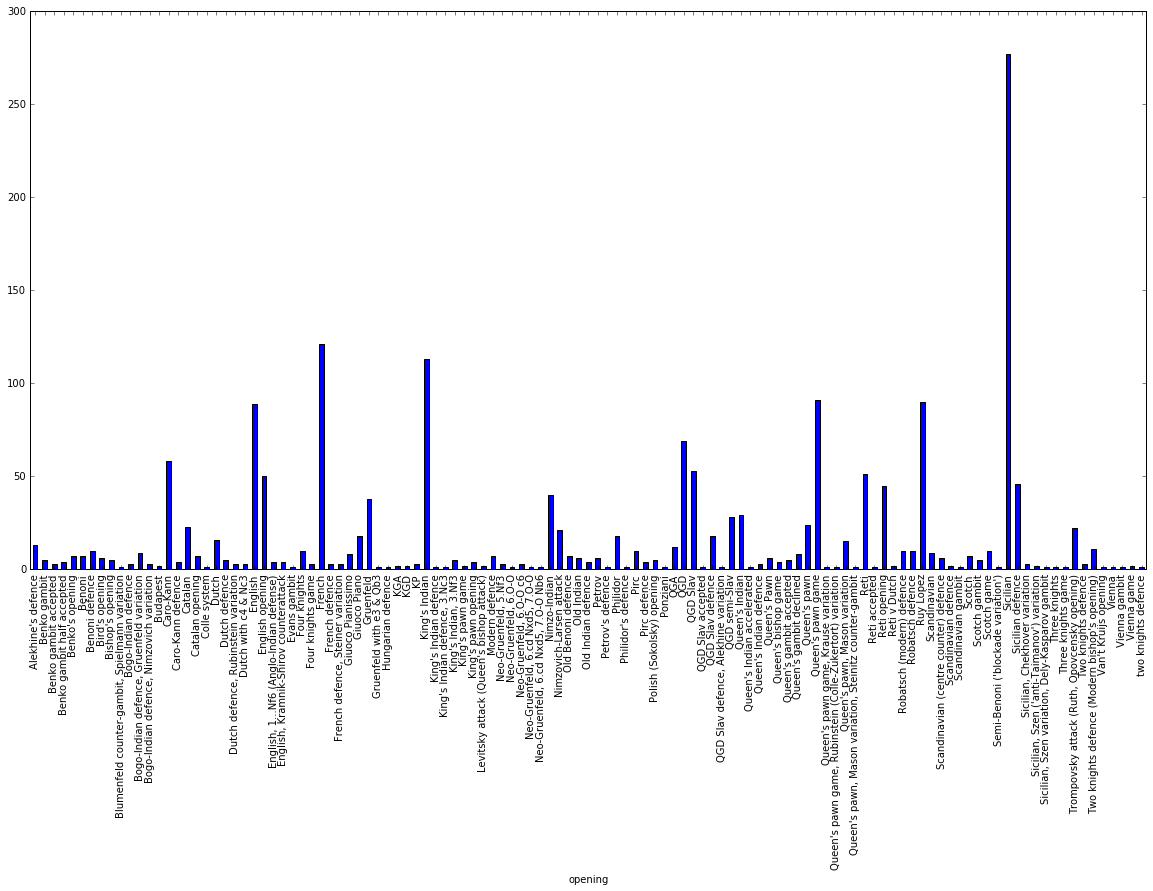

In [208]:
test.groupby(['opening']).size().plot(kind='bar',figsize=(20,10))

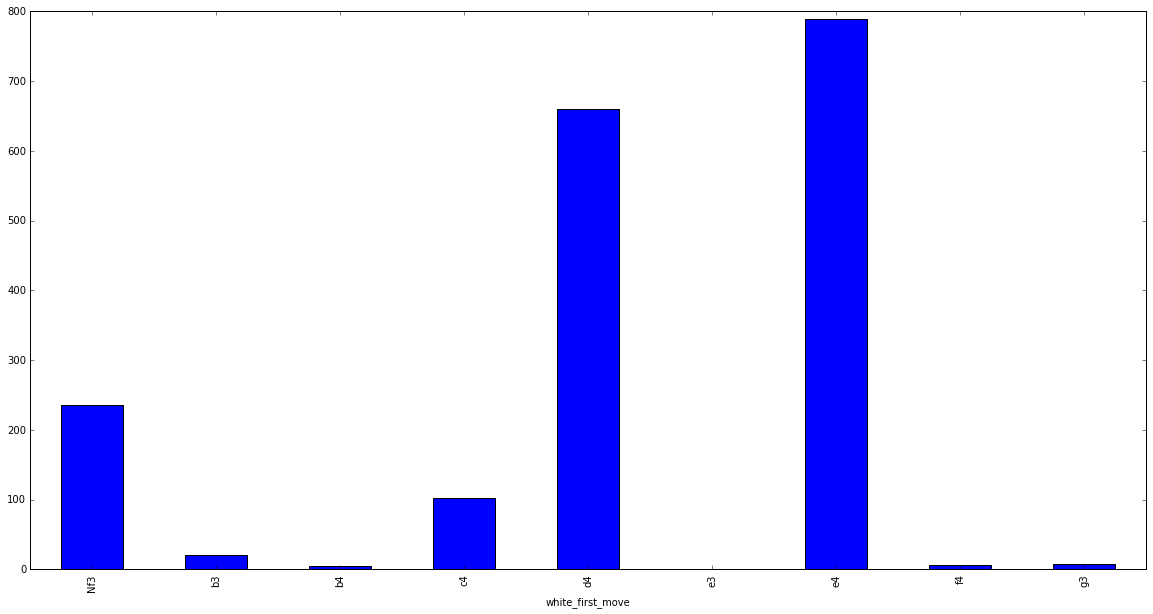

In [209]:
test.groupby(['white_first_move']).size().plot(kind='bar',figsize=(20,10))

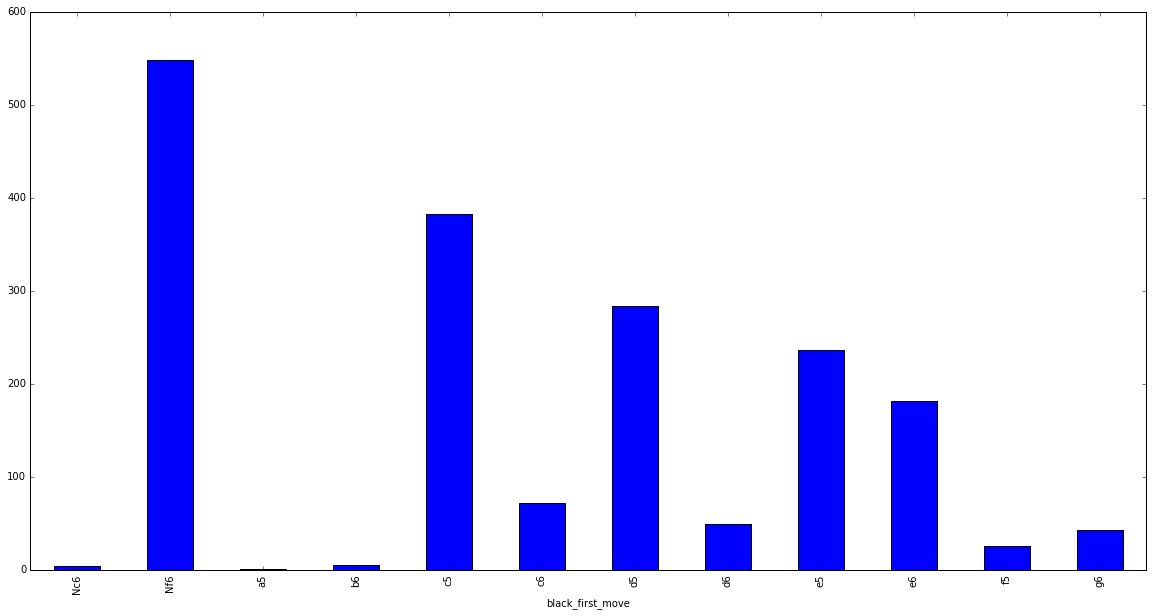

In [210]:
test.groupby(['black_first_move']).size().plot(kind='bar',figsize=(20,10))

In [221]:
test['whiteelo'].min()

inf

In [225]:
test[test['whiteelo']==test['whiteelo'].max()]

,black,blackelo,date,moves,opening,result,white,whiteelo,age,white_first_move,black_first_move,counter
126,"Ragger,M",2694,2016-11-07,1. Nf3 Nf6 2. g3 g6 3. d4 Bg7 4. Bg2 c5 5. c4 ...,King's Indian,1.0,"Vachier Lagrave,M",2811,7.0,Nf3,Nf6,1


In [ ]:
white elo is highest

In [228]:
np.argmax([test['whiteelo'].max(),test['blackelo'].max()])

0

In [232]:
test.groupby('white_first_move').size()/test.shape[0]

white_first_move
Nf3    0.128556
b3     0.011488
b4     0.002735
c4     0.056346
d4     0.361050
e3     0.000547
e4     0.431619
f4     0.003282
g3     0.004376
dtype: float64

In [233]:
test.groupby('black_first_move').size()/test.shape[0]

black_first_move
Nc6    0.002188
Nf6    0.299781
a5     0.000547
b6     0.002735
c5     0.208972
c6     0.039387
d5     0.154814
d6     0.026805
e5     0.129103
e6     0.099015
f5     0.013676
g6     0.022976
dtype: float64

In [237]:
test

,black,blackelo,date,moves,opening,result,white,whiteelo,age,white_first_move,black_first_move,counter
0,"Grischuk,A",2751,2016-11-06,1. e4 c5 2. Nf3 d6 3. d4 cxd4 4. Nxd4 Nf6 5. N...,Sicilian,0.0,"Getz,N",2434,8.0,e4,c5,1
1,"Hauge,Lars Oskar",2415,2016-11-06,1. Nf3 Nf6 2. c4 g6 3. Nc3 Bg7 4. e4 d6 5. d4 ...,King's Indian,0.0,"Tomashevsky,E",2722,8.0,Nf3,Nf6,1
2,Li Chao2,2730,2016-11-06,1. d4 e6 2. c4 f5 3. Nc3 Nf6 4. e3 Be7 5. Bd3 ...,"Dutch defence, Rubinstein variation",-1.0,"Mihajlov,Seb",2359,8.0,d4,e6,1
3,"Kovachev,D",2309,2016-11-06,1. d4 Nf6 2. c4 e6 3. Nc3 d5 4. Bg5 Nbd7 5. e3...,QGD,1.0,"Korobov,A",2689,8.0,d4,Nf6,1
4,"Rublevsky,S",2689,2016-11-06,1. d4 d5 2. Nf3 Nf6 3. g3 Bg4 4. Bg2 e6 5. O-O...,Queen's pawn game,-1.0,"Persson,Mat2",2314,8.0,d4,d5,1
5,"Stubberud,O",2281,2016-11-06,1. Nf3 Nf6 2. c4 g6 3. g3 Bg7 4. Bg2 d6 5. d4 ...,King's Indian,1.0,"Bocharov,D",2593,8.0,Nf3,Nf6,1
6,"Lauber,A",2434,2016-11-06,1. d4 Nf6 2. c4 e6 3. Nf3 b6 4. g3 Ba6 5. b3 d...,Queen's Indian,1.0,Ding Liren,2764,8.0,d4,Nf6,1
7,"Andreikin,D",2736,2016-11-06,1. d4 g6 2. c4 Bg7 3. e4 d6 4. Nc3 e5 5. Nf3 B...,Modern defence,-1.0,"Baldauf,Marc",2431,8.0,d4,g6,1
8,"Polzin,R",2413,2016-11-06,1. d4 Nf6 2. c4 g6 3. Nc3 Bg7 4. e4 d6 5. Nf3 ...,King's Indian,0.0,"Jakovenko,D",2709,8.0,d4,Nf6,1
9,Yu Yangyi,2721,2016-11-06,1. Nf3 d5 2. c4 e6 3. g3 dxc4 4. Bg2 a6 5. O-O...,English opening,-1.0,"Wendt,J",2332,8.0,Nf3,d5,1


In [217]:
def win_estimate(ratingA,ratingB,adj=0):
    """input is two ratings ratingA (white), ratingB (black)
    and an optional adjustment factor (adj) which will be added
    to ratingA (white). Usually white has a small advantage which
    has been observed to be about +32 to +50"""
    ratingA = ratingA+adj
    diff = ratingB-ratingA
    print diff
    ex = diff/400.
    return 1/(1+math.pow(10,ex))

In [220]:
win_estimate(1800,1900)

100


0.35993500019711494

In [240]:
#test['elo_estimate']=test['elo_estimate'].apply(win_estimate(test.whiteelo,test.blackelo,32))

In [244]:
test.groupby(['white_first_move','white']).size()/test.groupby('white').size()

white_first_move  white                       
Nf3               Abasov,N                        1.000000
                  Akesson,R                       0.500000
                  Akopova,A                       1.000000
                  Alvarez Pedraza,A               0.333333
                  Andersson,U                     1.000000
                  Arkell,K                        0.666667
                  Blit,J                          1.000000
                  Bocharov,D                      1.000000
                  Bodiroga,P                      0.333333
                  Bogdanic,Antonela               1.000000
                  Bogdanic,Katarina               0.333333
                  Bopp,T                          1.000000
                  Bosman,M                        1.000000
                  Brandenburg,D                   1.000000
                  Brodsky,M                       1.000000
                  Buhmann,R                       0.500000
         

pd.concat(objs, axis=0, join='outer', join_axes=None, ignore_index=False,
          keys=None, levels=None, names=None, verify_integrity=False,
          copy=True)

pd.merge(test, test.groupby(['white_first_move','white']).size()/test.groupby('white').size(), how='inner', on=['white_first_move','white'], left_on=None, right_on=None,
         left_index=False, right_index=False, sort=False,
         suffixes=('_x', '_y'), copy=True, indicator=False)

test.join(test.groupby(['white_first_move','white']).size()/test.groupby('white').size())

In [254]:
df_temp_freq = pd.DataFrame(test.groupby(['white_first_move','white']).size()/test.groupby('white').size())

In [256]:
df_temp_freq = df_temp_freq.reset_index()

In [263]:
df_temp_freq.rename(columns = {0:'white_first_move_freq'},inplace = True)

In [274]:
df_temp_freq.head()

,white_first_move,white,white_first_move_freq
0,Nf3,"Abasov,N",1.000000
1,Nf3,"Akesson,R",0.500000
2,Nf3,"Akopova,A",1.000000
3,Nf3,"Alvarez Pedraza,A",0.333333
4,Nf3,"Andersson,U",1.000000


In [270]:
test = pd.merge(test,df_temp_freq , on=['white_first_move','white'])

In [267]:
test[test.white == 'Tomashevsky,E']

,black,blackelo,date,moves,opening,result,white,whiteelo,age,white_first_move,black_first_move,counter
1,"Hauge,Lars Oskar",2415,2016-11-06,1. Nf3 Nf6 2. c4 g6 3. Nc3 Bg7 4. e4 d6 5. d4 ...,King's Indian,0.0,"Tomashevsky,E",2722,8.0,Nf3,Nf6,1


In [269]:
df_temp_freq[df_temp_freq.white == 'Tomashevsky,E']

,white_first_move,white,white_first_move_freq
157,Nf3,"Tomashevsky,E",1.0


In [271]:
df_temp_freq[df_temp_freq.white == 'Stefansson,Vignir Vatnar']

,white_first_move,white,white_first_move_freq
192,b3,"Stefansson,Vignir Vatnar",0.25
622,d4,"Stefansson,Vignir Vatnar",0.50
1160,g3,"Stefansson,Vignir Vatnar",0.25


In [272]:
test[test.white == 'Stefansson,Vignir Vatnar']

,black,blackelo,date,moves,opening,result,white,whiteelo,age,white_first_move,black_first_move,counter,white_first_move_freq
324,"Aira,Leonardo",1861,2016-10-28,1. d4 d5 2. c4 e6 3. Nf3 Be7 4. e3 Nf6 5. Bd3 ...,Queen's gambit declined,1.0,"Stefansson,Vignir Vatnar",2163,17.0,d4,d5,1,0.50
325,"Johannesson,Oliver",2263,2016-10-29,1. d4 d5 2. c4 c6 3. Nf3 Nf6 4. Nc3 dxc4 5. a4...,QGD Slav,0.0,"Stefansson,Vignir Vatnar",2163,16.0,d4,d5,1,0.50
386,"Storme,Isak",2153,2016-10-31,1. g3 c5 2. c4 Nc6 3. Nc3 g6 4. Bg2 Bg7 5. Nf3...,English,0.0,"Stefansson,Vignir Vatnar",2163,14.0,g3,c5,1,0.25
393,"Seo,Jung Min",2131,2016-11-01,1. b3 e5 2. Bb2 Nc6 3. e3 g6 4. f4 Bg7 5. Nf3 ...,Nimzovich-Larsen attack,1.0,"Stefansson,Vignir Vatnar",2163,13.0,b3,e5,1,0.25


In [276]:
df_temp_freq2 = pd.DataFrame(test.groupby(['black_first_move','black']).size()/test.groupby('black').size())

In [278]:
df_temp_freq2 = df_temp_freq2.reset_index()

In [280]:
df_temp_freq2.rename(columns = {0:'black_first_move_freq'},inplace = True)

In [282]:
test = pd.merge(test,df_temp_freq2 , on=['black_first_move','black'])

In [283]:
test.head()

,black,blackelo,date,moves,opening,result,white,whiteelo,age,white_first_move,black_first_move,counter,white_first_move_freq,black_first_move_freq
0,"Grischuk,A",2751,2016-11-06,1. e4 c5 2. Nf3 d6 3. d4 cxd4 4. Nxd4 Nf6 5. N...,Sicilian,0.0,"Getz,N",2434,8.0,e4,c5,1,1.0,0.5
1,"Hauge,Lars Oskar",2415,2016-11-06,1. Nf3 Nf6 2. c4 g6 3. Nc3 Bg7 4. e4 d6 5. d4 ...,King's Indian,0.0,"Tomashevsky,E",2722,8.0,Nf3,Nf6,1,1.0,1.0
2,Li Chao2,2730,2016-11-06,1. d4 e6 2. c4 f5 3. Nc3 Nf6 4. e3 Be7 5. Bd3 ...,"Dutch defence, Rubinstein variation",-1.0,"Mihajlov,Seb",2359,8.0,d4,e6,1,1.0,1.0
3,"Kovachev,D",2309,2016-11-06,1. d4 Nf6 2. c4 e6 3. Nc3 d5 4. Bg5 Nbd7 5. e3...,QGD,1.0,"Korobov,A",2689,8.0,d4,Nf6,1,1.0,1.0
4,"Rublevsky,S",2689,2016-11-06,1. d4 d5 2. Nf3 Nf6 3. g3 Bg4 4. Bg2 e6 5. O-O...,Queen's pawn game,-1.0,"Persson,Mat2",2314,8.0,d4,d5,1,1.0,1.0


In [284]:
test.head()

,black,blackelo,date,moves,opening,result,white,whiteelo,age,white_first_move,black_first_move,counter,white_first_move_freq,black_first_move_freq
0,"Grischuk,A",2751,2016-11-06,1. e4 c5 2. Nf3 d6 3. d4 cxd4 4. Nxd4 Nf6 5. N...,Sicilian,0.0,"Getz,N",2434,8.0,e4,c5,1,1.0,0.5
1,"Hauge,Lars Oskar",2415,2016-11-06,1. Nf3 Nf6 2. c4 g6 3. Nc3 Bg7 4. e4 d6 5. d4 ...,King's Indian,0.0,"Tomashevsky,E",2722,8.0,Nf3,Nf6,1,1.0,1.0
2,Li Chao2,2730,2016-11-06,1. d4 e6 2. c4 f5 3. Nc3 Nf6 4. e3 Be7 5. Bd3 ...,"Dutch defence, Rubinstein variation",-1.0,"Mihajlov,Seb",2359,8.0,d4,e6,1,1.0,1.0
3,"Kovachev,D",2309,2016-11-06,1. d4 Nf6 2. c4 e6 3. Nc3 d5 4. Bg5 Nbd7 5. e3...,QGD,1.0,"Korobov,A",2689,8.0,d4,Nf6,1,1.0,1.0
4,"Rublevsky,S",2689,2016-11-06,1. d4 d5 2. Nf3 Nf6 3. g3 Bg4 4. Bg2 e6 5. O-O...,Queen's pawn game,-1.0,"Persson,Mat2",2314,8.0,d4,d5,1,1.0,1.0


In [ ]:
#next add overall frequency features

In [285]:
new_test = test

In [ ]:
garbage = new_test.pop('moves')

In [288]:
garbage = new_test.pop('counter')

In [290]:
garbage = new_test.pop('date')

In [291]:
new_test.head()

,black,blackelo,opening,result,white,whiteelo,age,white_first_move,black_first_move,white_first_move_freq,black_first_move_freq
0,"Grischuk,A",2751,Sicilian,0.0,"Getz,N",2434,8.0,e4,c5,1.0,0.5
1,"Hauge,Lars Oskar",2415,King's Indian,0.0,"Tomashevsky,E",2722,8.0,Nf3,Nf6,1.0,1.0
2,Li Chao2,2730,"Dutch defence, Rubinstein variation",-1.0,"Mihajlov,Seb",2359,8.0,d4,e6,1.0,1.0
3,"Kovachev,D",2309,QGD,1.0,"Korobov,A",2689,8.0,d4,Nf6,1.0,1.0
4,"Rublevsky,S",2689,Queen's pawn game,-1.0,"Persson,Mat2",2314,8.0,d4,d5,1.0,1.0


In [292]:
player_cat_white = pd.get_dummies(test['white']);player_cat_white.head()

,"Abasov,N","Abdelazeez,Mohamed Abdalla","Abhishek,K","Aciu,Malina-Andreea","Acs,Peter","Aczel,G","Adams,P","Admiraal,M","Agrest,I","Ahmad,Al Khatib",...,"Zhigalko,S","Zhu,Hong Rui","Zhu,Jiner","Zhukova,N","Zienert,Richard","Zimina,O","Zozek,S","Zubov,A UKR","Zude,A","Zvjaginsev,V"
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [293]:
frames = [new_test, player_cat_white]

new_test = pd.concat(frames,axis=1)

In [294]:
new_test

,black,blackelo,opening,result,white,whiteelo,age,white_first_move,black_first_move,white_first_move_freq,...,"Zhigalko,S","Zhu,Hong Rui","Zhu,Jiner","Zhukova,N","Zienert,Richard","Zimina,O","Zozek,S","Zubov,A UKR","Zude,A","Zvjaginsev,V"
0,"Grischuk,A",2751,Sicilian,0.0,"Getz,N",2434,8.0,e4,c5,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"Hauge,Lars Oskar",2415,King's Indian,0.0,"Tomashevsky,E",2722,8.0,Nf3,Nf6,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Li Chao2,2730,"Dutch defence, Rubinstein variation",-1.0,"Mihajlov,Seb",2359,8.0,d4,e6,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"Kovachev,D",2309,QGD,1.0,"Korobov,A",2689,8.0,d4,Nf6,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"Rublevsky,S",2689,Queen's pawn game,-1.0,"Persson,Mat2",2314,8.0,d4,d5,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,"Stubberud,O",2281,King's Indian,1.0,"Bocharov,D",2593,8.0,Nf3,Nf6,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,"Lauber,A",2434,Queen's Indian,1.0,Ding Liren,2764,8.0,d4,Nf6,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,"Andreikin,D",2736,Modern defence,-1.0,"Baldauf,Marc",2431,8.0,d4,g6,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,"Polzin,R",2413,King's Indian,0.0,"Jakovenko,D",2709,8.0,d4,Nf6,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Yu Yangyi,2721,English opening,-1.0,"Wendt,J",2332,8.0,Nf3,d5,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [298]:
new_test.ix[0]['Getz,N']

1.0

In [299]:
garbage = new_test.pop('black') #need to find a way to encode this data also

In [ ]:
#try niave bayes and decision tree

In [307]:
new_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1793 entries, 0 to 1827
Columns: 1002 entries, blackelo to Zvjaginsev,V
dtypes: float64(996), object(6)
memory usage: 13.7+ MB


In [301]:
new_test = new_test.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [303]:
new_test.describe()

,result,age,white_first_move_freq,black_first_move_freq,"Abasov,N","Abdelazeez,Mohamed Abdalla","Abhishek,K","Aciu,Malina-Andreea","Acs,Peter","Aczel,G",...,"Zhigalko,S","Zhu,Hong Rui","Zhu,Jiner","Zhukova,N","Zienert,Richard","Zimina,O","Zozek,S","Zubov,A UKR","Zude,A","Zvjaginsev,V"
count,1793.000000,1793.000000,1793.000000,1793.000000,1793.000000,1793.000000,1793.000000,1793.000000,1793.000000,1793.000000,...,1793.000000,1793.000000,1793.000000,1793.000000,1793.000000,1793.000000,1793.000000,1793.000000,1793.000000,1793.000000
mean,0.077524,12.464027,0.879941,0.707488,0.000558,0.002231,0.001673,0.000558,0.000558,0.000558,...,0.002231,0.001673,0.000558,0.000558,0.000558,0.000558,0.001673,0.001673,0.001115,0.000558
std,0.832590,5.791192,0.224421,0.279847,0.023616,0.047193,0.040882,0.023616,0.023616,0.023616,...,0.047193,0.040882,0.023616,0.023616,0.023616,0.023616,0.040882,0.040882,0.033389,0.023616
min,-1.000000,7.000000,0.166667,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.000000,9.000000,0.833333,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,12.000000,1.000000,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,14.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,38.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [309]:
new_test.head()

,blackelo,opening,result,white,whiteelo,age,white_first_move,black_first_move,white_first_move_freq,black_first_move_freq,...,"Zhigalko,S","Zhu,Hong Rui","Zhu,Jiner","Zhukova,N","Zienert,Richard","Zimina,O","Zozek,S","Zubov,A UKR","Zude,A","Zvjaginsev,V"
0,2751,Sicilian,0.0,"Getz,N",2434,8.0,e4,c5,1.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2415,King's Indian,0.0,"Tomashevsky,E",2722,8.0,Nf3,Nf6,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2730,"Dutch defence, Rubinstein variation",-1.0,"Mihajlov,Seb",2359,8.0,d4,e6,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2309,QGD,1.0,"Korobov,A",2689,8.0,d4,Nf6,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2689,Queen's pawn game,-1.0,"Persson,Mat2",2314,8.0,d4,d5,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [310]:
y_opening = new_test.pop('opening')

In [311]:
y_white_first_move = new_test.pop('white_first_move')

In [312]:
y_black_first_move = new_test.pop('black_first_move')

In [314]:
garbage = new_test.pop('white')

In [317]:
garbage = new_test.pop('black_first_move_freq')

In [318]:
new_test.head()

,blackelo,result,whiteelo,age,white_first_move_freq,"Abasov,N","Abdelazeez,Mohamed Abdalla","Abhishek,K","Aciu,Malina-Andreea","Acs,Peter",...,"Zhigalko,S","Zhu,Hong Rui","Zhu,Jiner","Zhukova,N","Zienert,Richard","Zimina,O","Zozek,S","Zubov,A UKR","Zude,A","Zvjaginsev,V"
0,2751,0.0,2434,8.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2415,0.0,2722,8.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2730,-1.0,2359,8.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2309,1.0,2689,8.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2689,-1.0,2314,8.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Modeling...would like to add the features of popularity in class, popularity in dataset, winning percentage for both person and global

In [319]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [321]:
new_test.values

array([['2751', 0.0, '2434', ..., 0.0, 0.0, 0.0],
       ['2415', 0.0, '2722', ..., 0.0, 0.0, 0.0],
       ['2730', -1.0, '2359', ..., 0.0, 0.0, 0.0],
       ..., 
       ['2394', 0.0, '2230', ..., 0.0, 0.0, 0.0],
       ['2331', 0.0, '2286', ..., 0.0, 0.0, 0.0],
       ['2324', 0.0, '2234', ..., 0.0, 0.0, 0.0]], dtype=object)

In [322]:
X_train, X_test, y_train, y_test = train_test_split(new_test.values, y_white_first_move.values, test_size=0.30, random_state=42)

In [323]:
y_white_first_move.unique()

array(['e4', 'Nf3', 'd4', 'g3', 'c4', 'f4', 'b3', 'e3', 'b4'], dtype=object)

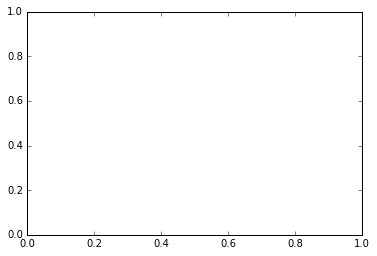

In [358]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import tree

clf1 = LogisticRegression(random_state=123)
clf2 = RandomForestClassifier(random_state=123)
clf3 = GaussianNB()
clf4 = MultinomialNB()
clf5 = tree.DecisionTreeClassifier()

X = X_train
y = y_train

eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],
                        voting='soft',
                        weights=[1, 1, 5])

# predict class probabilities for all classifiers
probas = [c.fit(X, y).predict_proba(X_test) for c in (clf1, clf2, clf3, eclf)]

# get class probabilities for the first sample in the dataset
class1_1 = [pr[0, 0] for pr in probas]
class2_1 = [pr[0, 1] for pr in probas]
class3_1 = [pr[0, 1] for pr in probas]
class4_1 = [pr[0, 1] for pr in probas]
class5_1 = [pr[0, 1] for pr in probas]
class6_1 = [pr[0, 1] for pr in probas]
class7_1 = [pr[0, 1] for pr in probas]
class8_1 = [pr[0, 1] for pr in probas]
class9_1 = [pr[0, 1] for pr in probas]

# plotting

N = 9  # number of groups
ind = np.arange(N)  # group positions
width = 0.35  # bar width

fig, ax = plt.subplots()

# # bars for classifier 1-3
# p1 = ax.bar(ind, np.hstack(([class1_1[:-1], [0]])), width, color='green')
# p2 = ax.bar(ind + width, np.hstack(([class2_1[:-1], [0]])), width, color='lightgreen')

# # bars for VotingClassifier
# p3 = ax.bar(ind, [0, 0, 0, class1_1[-1]], width, color='blue')
# p4 = ax.bar(ind + width, [0, 0, 0, class2_1[-1]], width, color='steelblue')

# # plot annotations
# plt.axvline(2.8, color='k', linestyle='dashed')
# ax.set_xticks(ind + width)
# ax.set_xticklabels(['LogisticRegression\nweight 1',
#                     'GaussianNB\nweight 1',
#                     'RandomForestClassifier\nweight 5',
#                     'VotingClassifier\n(average probabilities)'],
#                    rotation=40,
#                    ha='right')
# plt.ylim([0, 1])
# plt.title('Class probabilities for sample 1 by different classifiers')
# plt.legend([p1[0], p2[0]], ['class 1', 'class 2'], loc='upper left')
plt.show()

In [336]:
from sklearn.metrics import f1_score, accuracy_score
y_pred = clf3.fit(X_train, y_train).predict(X_test)
accuracy_score(y_test, y_pred)

#f1_score(y_test, y_pred, average='macro') 

0.47211895910780671

In [355]:
from sklearn.metrics import log_loss
clf_probs = clf3.predict_proba(X_test)
score = log_loss(y_test, clf_probs, labels=['e4', 'Nf3', 'd4', 'g3', 'c4', 'f4', 'b3', 'e3', 'b4']);print score
y_pred = clf3.fit(X_train, y_train).predict(X_test)
print accuracy_score(y_test, y_pred)
print f1_score(y_test, y_pred, average='macro') 

18.2041563939
0.472118959108
0.282397583475


In [363]:
# from sklearn.metrics import log_loss
# y_pred = clf4.fit(X_train, y_train).predict(X_test)
# clf_probs = clf4.predict_proba(X_test)
# score = log_loss(y_test, clf_probs, labels=['e4', 'Nf3', 'd4', 'g3', 'c4', 'f4', 'b3', 'e3', 'b4']);print score

# print accuracy_score(y_test, y_pred)
# print f1_score(y_test, y_pred, average='macro') 
#Multinomial X cant be negative

In [361]:
from sklearn.metrics import log_loss
y_pred = clf5.fit(X_train, y_train).predict(X_test)
clf_probs = clf5.predict_proba(X_test)
score = log_loss(y_test, clf_probs, labels=['e4', 'Nf3', 'd4', 'g3', 'c4', 'f4', 'b3', 'e3', 'b4']);print score

print accuracy_score(y_test, y_pred)
print f1_score(y_test, y_pred, average='macro') 

16.4990065678
0.522304832714
0.309689954806


In [346]:
#y_white_first_move.unique()

In [357]:

clf_probs = clf2.predict_proba(X_test)
score = log_loss(y_test, clf_probs, labels=['e4', 'Nf3', 'd4', 'g3', 'c4', 'f4', 'b3', 'e3', 'b4']);print score
y_pred = clf2.fit(X_train, y_train).predict(X_test)
print accuracy_score(y_test, y_pred)
print f1_score(y_test, y_pred, average='micro') 

3.96591504729
0.557620817844
0.557620817844


In [356]:
clf_probs = clf1.predict_proba(X_test)
score = log_loss(y_test, clf_probs, labels=['e4', 'Nf3', 'd4', 'g3', 'c4', 'f4', 'b3', 'e3', 'b4']);print score
y_pred = clf1.fit(X_train, y_train).predict(X_test)
print accuracy_score(y_test, y_pred)
print f1_score(y_test, y_pred, average='micro') 

1.17433816524
0.60780669145
0.60780669145


In [378]:
X_train, X_test, y_train, y_test = train_test_split(new_test.values, y_opening.values, test_size=0.30, random_state=42)

In [385]:

clf_probs = clf1.predict_proba(X_test)
#score = log_loss(y_test, clf_probs,labels=);print score
y_pred = clf1.fit(X_train, y_train).predict(X_test)
print accuracy_score(y_test, y_pred)
print f1_score(y_test, y_pred, average='micro') 

In [386]:
accuracy_score(y_test, y_pred)

0.13568773234200743

In [387]:
f1_score(y_test, y_pred, average='micro') 

0.13568773234200743

In [394]:
#log_loss(y_test, clf_probs);print score

In [408]:
clf1a = LogisticRegression(random_state=123,multi_class='multinomial',solver='newton-cg') 

In [409]:
y_pred = clf1a.fit(X_train, y_train).predict(X_test)
clf_probs = clf1a.predict_proba(X_test)
#score = log_loss(y_test, clf_probs, labels=['e4', 'Nf3', 'd4', 'g3', 'c4', 'f4', 'b3', 'e3', 'b4']);print score
print accuracy_score(y_test, y_pred)
print f1_score(y_test, y_pred, average='micro')

In [410]:
accuracy_score(y_test, y_pred)

0.13754646840148699

In [411]:
f1_score(y_test, y_pred, average='micro')

0.13754646840148699

In [412]:
clf2a = LogisticRegression(random_state=123,multi_class='multinomial',solver='sag') 
y_pred = clf2a.fit(X_train, y_train).predict(X_test)
clf_probs = clf2a.predict_proba(X_test)
#score = log_loss(y_test, clf_probs, labels=['e4', 'Nf3', 'd4', 'g3', 'c4', 'f4', 'b3', 'e3', 'b4']);print score
print accuracy_score(y_test, y_pred)
print f1_score(y_test, y_pred, average='micro')

In [413]:
accuracy_score(y_test, y_pred)

0.13568773234200743

In [414]:
f1_score(y_test, y_pred, average='micro')

0.13568773234200743

start

In [ ]:
cd games

In [ ]:
import sys  

reload(sys)  
sys.setdefaultencoding('utf8')
from __future__ import unicode_literals

game={}
games = []
#print type(games)
pgn_file="combined.pgn"
# datafile = open(pgn_file)
# datafile.close()
with open(pgn_file,'r') as datafile:
#    line = (line.decode().rstrip('\r\n') for line in datafile)
#    print lines.next
#    print lines.next
    for line in datafile:
        line = line.decode('latin-1').encode("utf-8")       

        #line = line.encode('latin-1')
        #line = line.encode('utf-8')
        #line = line.decode().rstrip('\r\n') 
        #    for line in lines:
        if line.startswith('['):
            tag,value=line[1:-1].split(' ',1)
            game[str(tag).lower()]=value.replace("]","").strip('"').encode('ascii', 'ignore')
        elif line.startswith('1.'):
            #only read first line: could add more readlines until a space
            game['moves']=line.encode('ascii', 'ignore')
            games.append(game)
            game = {}
            #print game
        #else:
            
#        elif line.startswith('1.'):
#            # read remaining lines of game
#            game['Moves']=line.encode('ascii', 'ignore')
#            #break
#            games.append(game)

In [ ]:
df = pd.DataFrame(games) 

In [7]:
newdf = df

In [9]:
#df.white.replace('"\r','')
df.white = df.white.map(lambda x: x.rstrip('"\r'))df.black = df.black.map(lambda x: x.rstrip('"\r'))
df.blackelo = df.blackelo.map(lambda x: x.rstrip('"\r'))
df.date = df.date.map(lambda x: x.rstrip('"\r'))
df.eco = df.eco.map(lambda x: x.rstrip('"\r'))



In [10]:
#df.fen = df.fen.map(lambda x: x.rstrip('"\r'))
df.result = df.result.map(lambda x: x.rstrip('"\r'))
df.whiteelo = df.whiteelo.map(lambda x: x.rstrip('"\r'))

In [12]:
#garbage = test.pop('blackteam')
#garbage = test.pop('blacktitle')
#garbage = test.pop('whiteteam')
#garbage = test.pop('whitetitle')
garbage = df.pop('eventdate')
#garbage = df.pop('eventtype')
garbage = df.pop('site')
#garbage = test.pop('variation')
garbage = df.pop('eco') # most precise drop for now in first dumb model
#garbage = test.pop('blackfideid')
#garbage = test.pop('whitefideid')
garbage = df.pop('event')
garbage = df.pop('fen')
garbage = df.pop('setup')
garbage = df.pop('round') # may have alot of variance, drop for now
#garbage = data_df.pop('opening') # second most precise drop for now in first dumb model

In [13]:
df.head()

,black,blackelo,date,moves,result,white,whiteelo
0,"Kosteniuk, Alexandra",2554,2016.02.29,1.Nf3 Nf6 2.g3 b6 3.Bg2 Bb7 4.O-O e6 5.d3 d5 6...,0-1,"Harika, Dronavalli",2511
1,"Ju, Wenjun",2558,2016.02.29,1.c4 c5 2.g3 Nf6 3.Bg2 d5 4.cxd5 Nxd5 5.Nc3 Nc...,0-1,"Mkrtchian, Lilit",2434
2,Wang Yue,2718,2016.02.29,1.c4 Nf6 2.Nc3 e6 3.e4 d5 4.e5 d4 5.exf6 dxc3 ...,0-1,"Ivanchuk, Vassily",2710
3,"Krush, Irina",2458,2016.02.29,1.c4 e5 2.Nc3 Nc6 3.g3 g6 4.Bg2 Bg7 5.e4 d6 6....,0-1,"Mkrtchian, Lilit",2434
4,"Paehtz, Elisabeth",2472,2016.02.29,1.Nf3 d6 2.g3 g6 3.Bg2 Bg7 4.O-O Nf6 5.d3 O-O ...,0-1,"Huang, Qian",2450


In [14]:
    d = {
    '0-1':-1.0,
    '1-0':1.0,
    '1/2-1/2':0.0
    }
    #add a new feature
    df['result'] = df['result'].map(d)

In [15]:
df.date = map(lambda x: str(x).replace(".",""),df.date)
df.date = pd.to_datetime(df.date, format='%Y%m%d', errors='ignore')


In [16]:
df['white_first_move'] = df.moves.apply(lambda x: x.split(" ")).apply(lambda x: x[1])
df['black_first_move'] = df.moves.apply(lambda x: x.split(" ")).apply(lambda x: x[2])


In [19]:
df.head()

,black,blackelo,date,moves,result,white,whiteelo,white_first_move,black_first_move
0,"Kosteniuk, Alexandra",2554,20160229,1.Nf3 Nf6 2.g3 b6 3.Bg2 Bb7 4.O-O e6 5.d3 d5 6...,-1.0,"Harika, Dronavalli",2511,Nf6,2.g3
1,"Ju, Wenjun",2558,20160229,1.c4 c5 2.g3 Nf6 3.Bg2 d5 4.cxd5 Nxd5 5.Nc3 Nc...,-1.0,"Mkrtchian, Lilit",2434,c5,2.g3
2,Wang Yue,2718,20160229,1.c4 Nf6 2.Nc3 e6 3.e4 d5 4.e5 d4 5.exf6 dxc3 ...,-1.0,"Ivanchuk, Vassily",2710,Nf6,2.Nc3
3,"Krush, Irina",2458,20160229,1.c4 e5 2.Nc3 Nc6 3.g3 g6 4.Bg2 Bg7 5.e4 d6 6....,-1.0,"Mkrtchian, Lilit",2434,e5,2.Nc3
4,"Paehtz, Elisabeth",2472,20160229,1.Nf3 d6 2.g3 g6 3.Bg2 Bg7 4.O-O Nf6 5.d3 O-O ...,-1.0,"Huang, Qian",2450,d6,2.g3


In [20]:
import pandas as pd
import datetime as DT
import io
import numpy as np
import math
from matplotlib import pyplot as plt
now = pd.Timestamp(DT.datetime.now())
#df['age'] = (now - df['date']).astype('timedelta64[D]')

In [27]:
df.white_first_move.unique()

array([u'Nf6', u'c5', u'e5', u'd6', u'd5', u'g6', u'e6', u'b6', u'c6',
       u'f5', u'Nh6', u'a5', u'Nc6', u'h5', u'b5', u'Na6', u'g5', u'a6',
       u'h6', u'f6', u'2.c3'], dtype=object)

In [29]:
df[df.white_first_move == '2.c3']

,black,blackelo,date,moves,result,white,whiteelo,white_first_move,black_first_move
1114192,"Jurkovic, Hrvoje",2426,2006????,1...c5 2.c3 Nf6 3.e5 Nd5 4.d4 cxd4 5.Nf3 Nc6 6...,-1.0,"Jeric, Simon",2328,2.c3,Nf6


delete the setup posision

In [40]:
df = df.drop(df.index[1114192])

In [42]:
df.info()

In [ ]:
player_cat_white = pd.get_dummies(df['white'])
#frames = [df, player_cat_white]

#df = pd.concat(frames,axis=1)

In [1]:
len(df.white.unique())

NameError: name 'df' is not defined

In [428]:
clean_df = df.map(lambda x: x.rstrip('"\r'))

AttributeError: 'DataFrame' object has no attribute 'map'

In [43]:
df = df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [45]:
df.count()


black               1861427
blackelo            1861427
date                1861427
moves               1861427
result              1861427
white               1861427
whiteelo            1861427
white_first_move    1861427
black_first_move    1861427
dtype: int64

In [46]:
import cPickle as pickle
#favorite_color = { "lion": "yellow", "kitty": "red" }
pickle.dump(df, open( "save_df.p", "wb" ) )

In [92]:
#player_cat_white = pd.get_dummies(df['white']) breaks due to high number of features

Restart here after kernel crash

In [1]:
cd games

/Users/eduardodaroza/intro_dsi/capstone/Capstone/games


In [2]:
pwd

u'/Users/eduardodaroza/intro_dsi/capstone/Capstone/games'

In [3]:
import cPickle as pickle

df = pickle.load( open( "save_df.p", "rb" ) )
# favorite_color is now { "lion": "yellow", "kitty": "red" }

In [4]:
#white_enc = pd.factorize(df.white)

In [5]:
#white_enc

In [6]:
len(df.white.unique())

57767

In [7]:
#max(white_enc[0])

#some EDA

/Users/eduardodaroza/anaconda2/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


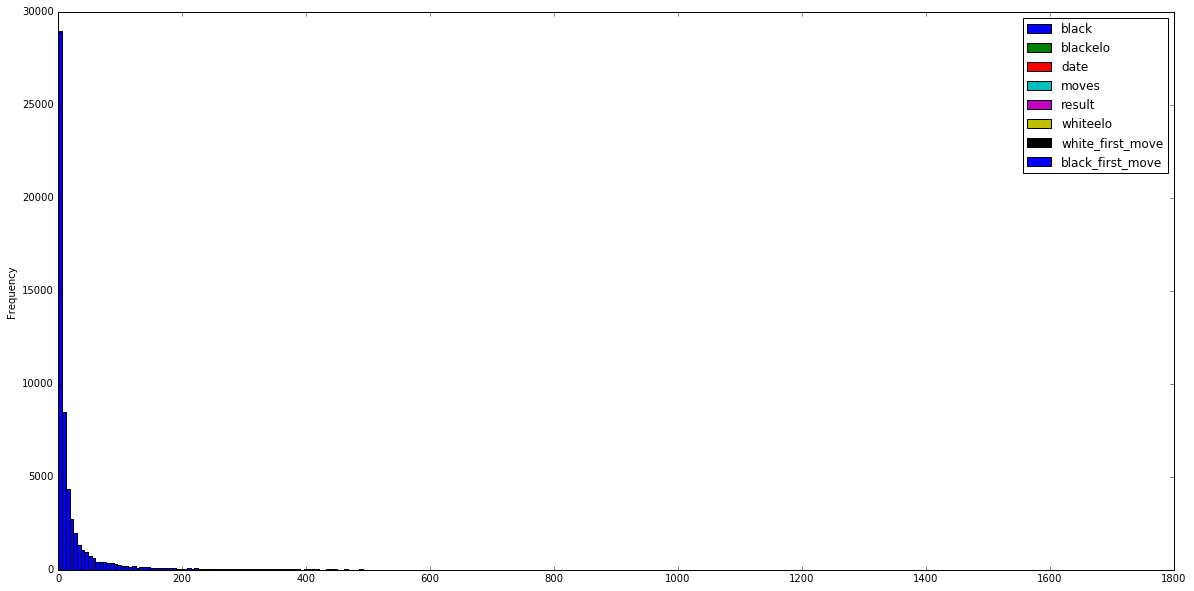

In [31]:
%matplotlib inline
df.groupby('white').count().sort('black',ascending=False).plot(kind='hist',bins=300,figsize=(20,10))

In [47]:
df.groupby('white').count().reset_index().head()

,white,black,blackelo,date,moves,result,whiteelo,white_first_move,black_first_move
0,"Aaberg, Anton",75,75,75,75,75,75,75,75
1,"Aabling-Thomsen, Jakob",163,163,163,163,163,163,163,163
2,"Aadeli, Arvin",2,2,2,2,2,2,2,2
3,"Aagaard, Gert",4,4,4,4,4,4,4,4
4,"Aagaard, Jacob",439,439,439,439,439,439,439,439


In [48]:
df.groupby('black').count().reset_index().head()

,black,blackelo,date,moves,result,white,whiteelo,white_first_move,black_first_move
0,"Aaberg, Anton",72,72,72,72,72,72,72,72
1,"Aabling-Thomsen, Jakob",175,175,175,175,175,175,175,175
2,"Aadeli, Arvin",2,2,2,2,2,2,2,2
3,"Aagaard, Gert",8,8,8,8,8,8,8,8
4,"Aagaard, Jacob",454,454,454,454,454,454,454,454


In [ ]:
df.groupby('black').count().reset_index()

In [49]:
garbage = df.pop('black')
garbage = df.pop('white')

In [26]:
garbage = df.pop('moves')

In [24]:
import cPickle as pickle
#favorite_color = { "lion": "yellow", "kitty": "red" }
pickle.dump(df, open( "save_df2.p", "wb" ) )

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1861427 entries, 0 to 1861584
Data columns (total 9 columns):
black               object
blackelo            int64
moves               object
result              float64
white               object
whiteelo            int64
white_first_move    object
black_first_move    object
age                 float64
dtypes: float64(2), int64(2), object(5)
memory usage: 142.0+ MB


In [4]:
#build model without player info

In [28]:
df.head()

,black,blackelo,result,white,whiteelo,white_first_move,black_first_move,age
0,"Kosteniuk, Alexandra",2554,-1.0,"Harika, Dronavalli",2511,Nf6,2.g3,260.0
1,"Ju, Wenjun",2558,-1.0,"Mkrtchian, Lilit",2434,c5,2.g3,260.0
2,Wang Yue,2718,-1.0,"Ivanchuk, Vassily",2710,Nf6,2.Nc3,260.0
3,"Krush, Irina",2458,-1.0,"Mkrtchian, Lilit",2434,e5,2.Nc3,260.0
4,"Paehtz, Elisabeth",2472,-1.0,"Huang, Qian",2450,d6,2.g3,260.0


In [58]:
#testdf = pickle.load( open( "save_df.p", "rb" ) )
# favorite_color is now { "lion": "yellow", "kitty": "red" }

In [ ]:
#have to fix the dates

In [103]:
str(df.date).find("?")

AttributeError: 'DataFrame' object has no attribute 'date'

In [9]:
#df[df.date.str.find("?") != -1]

In [10]:
df.date = map(lambda x: str(x).replace("?","1"),df.date)

In [11]:
#df.date.str.contains("?")

In [12]:
str(df.date).find("?")

-1

In [13]:
df['date'] = df['date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d', errors='coerce'))

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1861427 entries, 0 to 1861584
Data columns (total 9 columns):
black               object
blackelo            int64
moves               object
result              float64
white               object
whiteelo            int64
white_first_move    object
black_first_move    object
age                 float64
dtypes: float64(2), int64(2), object(5)
memory usage: 142.0+ MB


In [15]:
import pandas as pd
import datetime as DT
import io
import numpy as np
import math
from matplotlib import pyplot as plt
now = pd.Timestamp(DT.datetime.now())
df['age'] = (now - df['date']).astype('timedelta64[D]')

In [16]:
df.age.head()

0    260.0
1    260.0
2    260.0
3    260.0
4    260.0
Name: age, dtype: float64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1861427 entries, 0 to 1861584
Data columns (total 8 columns):
black               object
blackelo            int64
result              float64
white               object
whiteelo            int64
white_first_move    object
black_first_move    object
age                 float64
dtypes: float64(2), int64(2), object(4)
memory usage: 127.8+ MB


In [18]:
min(df.age)

260.0

In [19]:
garbage = df.pop('date')

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1861427 entries, 0 to 1861584
Data columns (total 9 columns):
black               object
blackelo            int64
moves               object
result              float64
white               object
whiteelo            int64
white_first_move    object
black_first_move    object
age                 float64
dtypes: float64(2), int64(2), object(5)
memory usage: 142.0+ MB


In [ ]:
restart from here

In [101]:
#import cPickle as pickle

df = pickle.load( open( "save_df2.p", "rb" ) ) #takes care of date

In [24]:
def win_estimate(ratingA,ratingB,adj=0):
    """input is two ratings ratingA (white), ratingB (black)
    and an optional adjustment factor (adj) which will be added
    to ratingA (white). Usually white has a small advantage which
    has been observed to be about +32 to +50"""
    ratingA = ratingA+adj
    diff = ratingB-ratingA
    print diff
    ex = diff/400.
    return 1/(1+math.pow(10,ex))

In [105]:
def win_estimate_df(df,adj=32):
    """input is two ratings ratingA (white), ratingB (black)
    and an optional adjustment factor (adj) which will be added
    to ratingA (white). Usually white has a small advantage which
    has been observed to be about +32 to +50"""
    df[0] = df[0]+adj
    diff = df[1]-df[0]
    #print diff
    ex = diff/400.
    return 1/(1+math.pow(10,ex))

In [106]:
df.whiteelo = df.whiteelo.astype(int)

In [108]:
df.blackelo = df.blackelo.astype(int)

In [109]:
df.black = df.black.astype(str) #didnt change

In [110]:
df.white = df.white.astype(str) #didnt change

In [97]:
df.head()

,black,blackelo,result,white,whiteelo,age,estimate_white_win_by_rating
0,"Kosteniuk, Alexandra",2554,-1.0,"Harika, Dronavalli",2511,260.0,0.484175
1,"Ju, Wenjun",2558,-1.0,"Mkrtchian, Lilit",2434,260.0,0.370611
2,Wang Yue,2718,-1.0,"Ivanchuk, Vassily",2710,260.0,0.534484
3,"Krush, Irina",2458,-1.0,"Mkrtchian, Lilit",2434,260.0,0.511511
4,"Paehtz, Elisabeth",2472,-1.0,"Huang, Qian",2450,260.0,0.514387


In [111]:
df['estimate_white_win_by_rating'] = df[['whiteelo','blackelo']].apply(win_estimate_df,axis=1)

In [112]:
df.head(10)

,black,blackelo,moves,result,white,whiteelo,white_first_move,black_first_move,age,estimate_white_win_by_rating
0,"Kosteniuk, Alexandra",2554,1.Nf3 Nf6 2.g3 b6 3.Bg2 Bb7 4.O-O e6 5.d3 d5 6...,-1.0,"Harika, Dronavalli",2511,Nf6,2.g3,260.0,0.484175
1,"Ju, Wenjun",2558,1.c4 c5 2.g3 Nf6 3.Bg2 d5 4.cxd5 Nxd5 5.Nc3 Nc...,-1.0,"Mkrtchian, Lilit",2434,c5,2.g3,260.0,0.370611
2,Wang Yue,2718,1.c4 Nf6 2.Nc3 e6 3.e4 d5 4.e5 d4 5.exf6 dxc3 ...,-1.0,"Ivanchuk, Vassily",2710,Nf6,2.Nc3,260.0,0.534484
3,"Krush, Irina",2458,1.c4 e5 2.Nc3 Nc6 3.g3 g6 4.Bg2 Bg7 5.e4 d6 6....,-1.0,"Mkrtchian, Lilit",2434,e5,2.Nc3,260.0,0.511511
4,"Paehtz, Elisabeth",2472,1.Nf3 d6 2.g3 g6 3.Bg2 Bg7 4.O-O Nf6 5.d3 O-O ...,-1.0,"Huang, Qian",2450,d6,2.g3,260.0,0.514387
5,"Krush, Irina",2458,1.Nf3 d5 2.g3 Bg4 3.Bg2 Nd7 4.c4 e6 5.cxd5 exd...,0.0,"Ju, Wenjun",2558,d5,2.g3,260.0,0.681322
6,"Gunina, Valentina",2496,1.Nf3 d5 2.g3 c6 3.Bg2 Bg4 4.c4 e6 5.cxd5 exd5...,1.0,Zhao Xue,2506,d5,2.g3,260.0,0.560150
7,"Ushenina, A",2450,1.Nf3 d5 2.g3 c6 3.c4 Nf6 4.Bg2 dxc4 5.O-O Nbd...,1.0,Tan Zhongyi,2504,d5,2.g3,260.0,0.621297
8,"Lagno, Kateryna",2529,1.c4 g6 2.Nc3 c5 3.g3 Bg7 4.Bg2 Nc6 5.d3 e6 6....,-1.0,"Dzagnidze, Nana",2529,g6,2.Nc3,260.0,0.545922
9,"Tomashevsky, E",2728,1.g3 d5 2.Bg2 c6 3.d3 Nf6 4.Nd2 e5 5.e4 Bd6 6....,0.0,"Mamedov, Rauf",2650,d5,2.Bg2,260.0,0.434185


In [206]:
df['diff'] = df['blackelo']-df['whiteelo']

/Users/eduardodaroza/anaconda2/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [207]:
df[['diff','estimate_white_win_by_rating']]

,diff,estimate_white_win_by_rating
0,43,0.484175
1,124,0.370611
2,8,0.534484
3,24,0.511511
4,22,0.514387
5,-100,0.681322
6,-10,0.560150
7,-54,0.621297
8,0,0.545922
9,78,0.434185


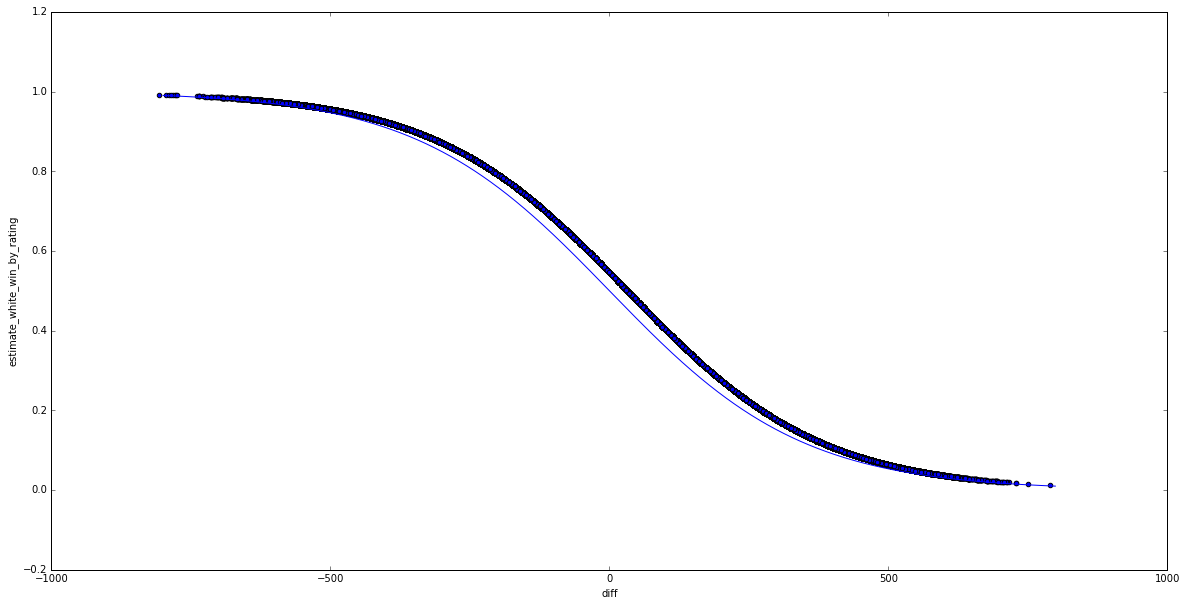

In [209]:
%matplotlib inline
from math import pow 
df[['diff','estimate_white_win_by_rating']].plot(kind='scatter',x='diff',y='estimate_white_win_by_rating',figsize=(20,10))
t = xrange(-800,800,1)
s=[]
for item in t:
    output = 1.0/(1 + math.pow(10.0,item/400.0))
    s.append(output)
plt.plot(t, s)

In [ ]:
#avg rating difference between players

In [215]:
df['diff'].sum()/df['diff'].count()

-3

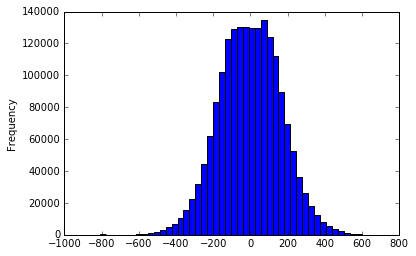

In [230]:
df['diff'].plot(kind='hist',bins=50)

In [223]:
df['diff'].std()

165.32050455649426

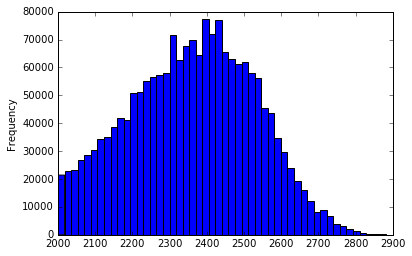

In [226]:
df.whiteelo.plot(kind='hist',bins=50)

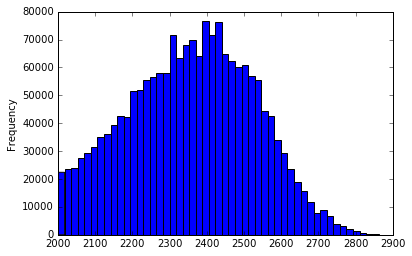

In [228]:
df.blackelo.plot(kind='hist',bins=50)

In [ ]:
#statistically different ratings?

In [113]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1861396 entries, 0 to 1861584
Data columns (total 7 columns):
black                           object
blackelo                        int64
result                          float64
white                           category
whiteelo                        int64
age                             float64
estimate_white_win_by_rating    float64
dtypes: category(1), float64(3), int64(2), object(1)
memory usage: 107.0+ MB


In [114]:
dftest2 = df

In [119]:
garbage = df.pop('black_first_move')

In [55]:
#df['black'] = df['black'].astype('str')

In [57]:
#df['white'] = df['white'].astype('str')

In [84]:
df.head()

,black,blackelo,result,white,whiteelo,age,estimate_white_win_by_rating
0,"Kosteniuk, Alexandra",2554,-1.0,"Harika, Dronavalli",2511,260.0,0.484175
1,"Ju, Wenjun",2558,-1.0,"Mkrtchian, Lilit",2434,260.0,0.370611
2,Wang Yue,2718,-1.0,"Ivanchuk, Vassily",2710,260.0,0.534484
3,"Krush, Irina",2458,-1.0,"Mkrtchian, Lilit",2434,260.0,0.511511
4,"Paehtz, Elisabeth",2472,-1.0,"Huang, Qian",2450,260.0,0.514387


In [117]:
df = df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [120]:
df.head()

,black,blackelo,moves,result,white,whiteelo,white_first_move,age,estimate_white_win_by_rating
0,"Kosteniuk, Alexandra",2554,1.Nf3 Nf6 2.g3 b6 3.Bg2 Bb7 4.O-O e6 5.d3 d5 6...,-1.0,"Harika, Dronavalli",2511,Nf6,260.0,0.484175
1,"Ju, Wenjun",2558,1.c4 c5 2.g3 Nf6 3.Bg2 d5 4.cxd5 Nxd5 5.Nc3 Nc...,-1.0,"Mkrtchian, Lilit",2434,c5,260.0,0.370611
2,Wang Yue,2718,1.c4 Nf6 2.Nc3 e6 3.e4 d5 4.e5 d4 5.exf6 dxc3 ...,-1.0,"Ivanchuk, Vassily",2710,Nf6,260.0,0.534484
3,"Krush, Irina",2458,1.c4 e5 2.Nc3 Nc6 3.g3 g6 4.Bg2 Bg7 5.e4 d6 6....,-1.0,"Mkrtchian, Lilit",2434,e5,260.0,0.511511
4,"Paehtz, Elisabeth",2472,1.Nf3 d6 2.g3 g6 3.Bg2 Bg7 4.O-O Nf6 5.d3 O-O ...,-1.0,"Huang, Qian",2450,d6,260.0,0.514387


In [121]:
 type(df['white_first_move'])

pandas.core.series.Series

In [122]:
df["white"] = df["white"].astype('category')

/Users/eduardodaroza/anaconda2/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [126]:
df['black'] = df['black'].astype('category')

/Users/eduardodaroza/anaconda2/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1861396 entries, 0 to 1861584
Data columns (total 8 columns):
black                           category
blackelo                        int64
result                          float64
white                           category
whiteelo                        int64
white_first_move                object
age                             float64
estimate_white_win_by_rating    float64
dtypes: category(2), float64(3), int64(2), object(1)
memory usage: 114.5+ MB


In [128]:
dftest = df

In [125]:
garbage = df.pop('moves')

In [129]:
clf = RandomForestClassifier(n_jobs=2)
y, _ = pd.factorize(df['white_first_move'])
#clf.fit(train[features], y)

In [139]:
len(y)

1861396

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1861396 entries, 0 to 1861584
Data columns (total 8 columns):
black                           category
blackelo                        int64
result                          float64
white                           category
whiteelo                        int64
white_first_move                object
age                             float64
estimate_white_win_by_rating    float64
dtypes: category(2), float64(3), int64(2), object(1)
memory usage: 114.5+ MB


In [140]:
X = df[['blackelo','result','whiteelo','age','estimate_white_win_by_rating']].values

In [141]:
X


array([[  2.55400000e+03,  -1.00000000e+00,   2.51100000e+03,
          2.60000000e+02,   4.84175015e-01],
       [  2.55800000e+03,  -1.00000000e+00,   2.43400000e+03,
          2.60000000e+02,   3.70611453e-01],
       [  2.71800000e+03,  -1.00000000e+00,   2.71000000e+03,
          2.60000000e+02,   5.34483945e-01],
       ..., 
       [  2.49500000e+03,   1.00000000e+00,   2.53500000e+03,
          9.77400000e+03,   6.02158093e-01],
       [  2.46500000e+03,   0.00000000e+00,   2.33500000e+03,
          9.77400000e+03,   3.62591623e-01],
       [  2.49500000e+03,  -1.00000000e+00,   2.53500000e+03,
          9.50100000e+03,   6.02158093e-01]])

In [142]:
from sklearn.model_selection import train_test_split

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

IAMHERE

In [150]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import tree

clf1 = LogisticRegression(random_state=123)
clf2 = RandomForestClassifier(random_state=123,n_estimators=10)
clf3 = GaussianNB()
clf4 = MultinomialNB()
clf5 = tree.DecisionTreeClassifier()


i am here

In [145]:
# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()
# le.fit(["paris", "paris", "tokyo", "amsterdam"])

# list(le.classes_)
# #le.transform(["tokyo", "tokyo", "paris"]) 

# >>> list(le.inverse_transform([2, 2, 1]))

In [151]:
y_pred = clf1.fit(X_train, y_train).predict(X_test)
from sklearn.metrics import accuracy_score,f1_score
print accuracy_score(y_test, y_pred)
print f1_score(y_test, y_pred, average='micro') 


0.281863618537
0.281863618537


In [152]:
from sklearn.metrics import log_loss
clf_probs = clf1.predict_proba(X_test)
score = log_loss(y_test, clf_probs);print score


1.92466068793


In [153]:
y_test

array([0, 0, 1, ..., 1, 2, 0])

In [154]:
X_test[0]

array([  2.37000000e+03,  -1.00000000e+00,   2.16300000e+03,
         3.47300000e+03,   2.67492710e-01])

In [161]:
clf1.predict([  2.17000000e+03,  1.00000000e+00,   2.16300000e+03,
         3.47300000e+03,   2.67492710e-01])

/Users/eduardodaroza/anaconda2/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([0])

In [164]:
pd.crosstab(y_test, y_pred, rownames=['actual'], colnames=['preds'])

preds,0,1
actual,,
0,137358,17743
1,115056,20040
2,53882,6492
3,17715,2831
4,71616,7257
5,17339,3527
6,43888,5770
7,1614,311
8,21005,2624


In [165]:

y_pred = clf2.fit(X_train, y_train).predict(X_test)

print accuracy_score(y_test, y_pred)
print f1_score(y_test, y_pred, average='micro') 

0.284406511956
0.284406511956


random forest is worst than logit

In [166]:
clf_probs = clf2.predict_proba(X_test)
score = log_loss(y_test, clf_probs);print score

10.5695259124


In [167]:
y_pred = clf3.fit(X_train, y_train).predict(X_test)

print accuracy_score(y_test, y_pred)
print f1_score(y_test, y_pred, average='micro') 

0.28630830971
0.28630830971


In [168]:
clf_probs = clf3.predict_proba(X_test)
score = log_loss(y_test, clf_probs);print score

1.92251689475


In [170]:
# y_pred = clf4.fit(X_train, y_train).predict(X_test)

# print accuracy_score(y_test, y_pred)
# print f1_score(y_test, y_pred, average='micro') 
# clf_probs = clf4.predict_proba(X_test)
# score = log_loss(y_test, clf_probs);print score

In [171]:
y_pred = clf5.fit(X_train, y_train).predict(X_test)

print accuracy_score(y_test, y_pred)
print f1_score(y_test, y_pred, average='micro') 
clf_probs = clf5.predict_proba(X_test)
score = log_loss(y_test, clf_probs);print score

0.25368048007
0.25368048007
25.5075949112


In [ ]:
clf_probs = clf2.predict_proba(X_test)
score = log_loss(y_test, clf_probs, labels=['e4', 'Nf3', 'd4', 'g3', 'c4', 'f4', 'b3', 'e3', 'b4']);print score

In [166]:
white_times_played = test.groupby(['opening','white']).agg('count').reset_index()

In [177]:
white_first_move_freq = test.groupby(['white_first_move','white']).agg('count').reset_index()

In [181]:
white_first_move_freq.size()

TypeError: 'numpy.int64' object is not callable

In [174]:
white_freq = test.groupby(['white']).agg('count')

In [175]:
white_freq

,black,blackelo,date,moves,opening,result,whiteelo,age,white_first_move,black_first_move
white,,,,,,,,,,
"Abasov,N",1,1,1,1,1,1,1,1,1,1
"Abdelazeez,Mohamed Abdalla",4,4,4,4,4,4,4,4,4,4
"Abhishek,K",3,3,3,3,3,3,3,3,3,3
"Aciu,Malina-Andreea",1,1,1,1,1,1,1,1,1,1
"Acs,Peter",1,1,1,1,1,1,1,1,1,1
"Aczel,G",1,1,1,1,1,1,1,1,1,1
"Adams,P",4,4,4,4,4,4,4,4,4,4
"Admiraal,M",2,2,2,2,2,2,2,2,2,2
"Agrest,I",1,1,1,1,1,1,1,1,1,1


In [82]:
test[test.white == 'Lindberg,H']

,Moves,black,blackelo,date,opening,result,white,whiteelo
725,1. e4 Nf6 2. e5 Nd5 3. c4 Nb6 4. d4 d6 5. exd6...,"Arman,D",2331,2016.11.04,Alekhine's defence,1.0,"Lindberg,H",2253
742,1. e4 Nf6 2. e5 Nd5 3. c4 Nb6 4. d4 d6 5. exd6...,"Eriksson,Jon FIN",2147,2016.11.05,Alekhine's defence,1.0,"Lindberg,H",2253


In [84]:
test[test.white == 'Golub,Nikolina']

,Moves,black,blackelo,date,opening,result,white,whiteelo
1095,1. d4 Nf6 2. c4 e6 3. Nc3 Be7 4. e4 O-O 5. e5 ...,"Samblic,S",1948,2016.10.31,Queen's pawn game,-1.0,"Golub,Nikolina",1814
1123,1. d4 Nf6 2. c4 c5 3. d5 b5 4. cxb5 a6 5. bxa6...,"Sindik,D",1910,2016.11.02,Benko gambit accepted,0.0,"Golub,Nikolina",1814
1143,1. d4 d5 2. c4 e5 3. dxe5 d4 4. Nf3 c5 5. e3 N...,"Causevic,Miro",1653,2016.11.04,QGD,1.0,"Golub,Nikolina",1814


In [108]:
games

[{'Black': 'Hachijan,A"]',
  'BlackElo': '2324"]',
  'BlackFideId': '1028081"]',
  'BlackTeam': 'MuConsult Apeldoorn"]',
  'BlackTitle': 'FM"]',
  'Date': '2016.11.05"]',
  'ECO': 'B84"]',
  'Event': 'Dutch League 2016-17"]',
  'EventDate': '2016.09.17"]',
  'EventType': 'team-tourn"]',
  'Opening': 'Sicilian"]',
  'Result': '1/2-1/2"]',
  'Round': '3.10"]',
  'Site': 'Netherlands NED"]',
  'Variation': 'Scheveningen (Paulsen), classical variation"]',
  'White': 'Schippers,Maurice"]',
  'WhiteElo': '2234"]',
  'WhiteFideId': '1004735"]',
  'WhiteTeam': 'Groninger Combination"]',
  'WhiteTitle': 'FM"]'},
 {'Black': 'Hachijan,A"]',
  'BlackElo': '2324"]',
  'BlackFideId': '1028081"]',
  'BlackTeam': 'MuConsult Apeldoorn"]',
  'BlackTitle': 'FM"]',
  'Date': '2016.11.05"]',
  'ECO': 'B84"]',
  'Event': 'Dutch League 2016-17"]',
  'EventDate': '2016.09.17"]',
  'EventType': 'team-tourn"]',
  'Opening': 'Sicilian"]',
  'Result': '1/2-1/2"]',
  'Round': '3.10"]',
  'Site': 'Netherlands NED"]

In [116]:
ls

OrderN.ipynb    Untitled.ipynb  twic1148.json
Tweety.ipynb    example.pgn     twic1148.pgn*


In [117]:
df3 = pd.read_json('twic1148.json')

ValueError: Trailing data

Lets start here:

In [118]:
import pandas as pd

# read the entire file into a python array
with open('twic1148.json', 'rb') as f:
    data = f.readlines()

# remove the trailing "\n" from each line
data = map(lambda x: x.rstrip(), data)

# each element of 'data' is an individual JSON object.
# i want to convert it into an *array* of JSON objects
# which, in and of itself, is one large JSON object
# basically... add square brackets to the beginning
# and end, and have all the individual business JSON objects
# separated by a comma
data_json_str = "[" + ','.join(data) + "]"

# now, load it into pandas
data_df = pd.read_json(data_json_str)

In [121]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1833 entries, 0 to 1832
Data columns (total 21 columns):
black          1833 non-null object
blackelo       1817 non-null float64
blackfideid    1827 non-null float64
blackteam      444 non-null object
blacktitle     1127 non-null object
date           1833 non-null datetime64[ns]
eco            1828 non-null object
event          1833 non-null object
eventdate      1833 non-null object
eventtype      372 non-null object
moves          1828 non-null object
opening        1821 non-null object
result         1833 non-null object
round          1833 non-null float64
site           1833 non-null object
variation      1233 non-null object
white          1833 non-null object
whiteelo       1820 non-null float64
whitefideid    1828 non-null float64
whiteteam      444 non-null object
whitetitle     1144 non-null object
dtypes: datetime64[ns](1), float64(5), object(15)
memory usage: 315.0+ KB


columns I need: white,black,whiteelo,blackelo,date,eco,event,eventdate,moves,opening,result,round,site,variation

In [134]:
#cols = ['white','black','whiteelo','blackelo','date','eco','event','eventdate','opening','result','round','site','variation','moves']
result = data_df[['white','black','whiteelo','blackelo','date','eco','event','eventdate','opening','result','round','site','variation','moves']]

In [135]:
result

,white,black,whiteelo,blackelo,date,eco,event,eventdate,opening,result,round,site,variation,moves
0,"Getz,N","Grischuk,A",2434.0,2751.0,2016-11-06,B90,32nd ECC Open 2016,2016.11.06,Sicilian,1/2-1/2,1.1,Novi Sad SRB,"Najdorf, Adams attack","{u'24': {u'white': {u'move': u'Qf7+'}, u'black..."
1,"Tomashevsky,E","Hauge,Lars Oskar",2722.0,2415.0,2016-11-06,E90,32nd ECC Open 2016,2016.11.06,King's Indian,1/2-1/2,1.1,Novi Sad SRB,5.Nf3,"{u'56': {u'white': {u'move': u'Rd4+'}, u'black..."
2,"Mihajlov,Seb",Li Chao2,2359.0,2730.0,2016-11-06,A84,32nd ECC Open 2016,2016.11.06,"Dutch defence, Rubinstein variation",0-1,1.1,Novi Sad SRB,NaN,"{u'42': {u'white': {u'move': u'Be7'}, u'black'..."
3,"Korobov,A","Kovachev,D",2689.0,2309.0,2016-11-06,D51,32nd ECC Open 2016,2016.11.06,QGD,1-0,1.1,Novi Sad SRB,NaN,"{u'24': {u'white': {u'move': u'Rfd1'}, u'black..."
4,"Persson,Mat2","Rublevsky,S",2314.0,2689.0,2016-11-06,D02,32nd ECC Open 2016,2016.11.06,Queen's pawn game,0-1,1.1,Novi Sad SRB,NaN,"{u'42': {u'white': {u'move': u'g5'}, u'black':..."
5,"Bocharov,D","Stubberud,O",2593.0,2281.0,2016-11-06,E63,32nd ECC Open 2016,2016.11.06,King's Indian,1-0,1.1,Novi Sad SRB,"fianchetto, Panno variation","{u'24': {u'white': {u'move': u'Ne4'}, u'black'..."
6,Ding Liren,"Lauber,A",2764.0,2434.0,2016-11-06,E15,32nd ECC Open 2016,2016.11.06,Queen's Indian,1-0,1.2,Novi Sad SRB,Nimzovich variation (exaggerated fianchetto),"{u'42': {u'white': {u'move': u'f4'}, u'black':..."
7,"Baldauf,Marc","Andreikin,D",2431.0,2736.0,2016-11-06,A42,32nd ECC Open 2016,2016.11.06,Modern defence,0-1,1.2,Novi Sad SRB,Averbakh system,"{u'24': {u'white': {u'move': u'Qe1'}, u'black'..."
8,"Jakovenko,D","Polzin,R",2709.0,2413.0,2016-11-06,E90,32nd ECC Open 2016,2016.11.06,King's Indian,1/2-1/2,1.2,Novi Sad SRB,5.Nf3,"{u'24': {u'white': {u'move': u'Nc3'}, u'black'..."
9,"Wendt,J",Yu Yangyi,2332.0,2721.0,2016-11-06,A13,32nd ECC Open 2016,2016.11.06,English opening,0-1,1.2,Novi Sad SRB,Agincourt variation,"{u'24': {u'white': {u'move': u'Kh1'}, u'black'..."


In [136]:
d = {
  '0-1': 'black_win',
  '1-0': 'white_win',
  '1/2-1/2': 'draw'
}

In [137]:
result['result'] = result['result'].map(d)

/Users/eduardodaroza/anaconda2/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [138]:
result['result']

0            draw
1            draw
2       black_win
3       white_win
4       black_win
5       white_win
6       white_win
7       black_win
8            draw
9       black_win
10           draw
11      black_win
12      black_win
13      white_win
14      black_win
15      white_win
16      black_win
17           draw
18      white_win
19      black_win
20      white_win
21      black_win
22      white_win
23           draw
24           draw
25      white_win
26      black_win
27      white_win
28      black_win
29      white_win
          ...    
1803         draw
1804    white_win
1805         draw
1806         draw
1807    white_win
1808         draw
1809    white_win
1810    white_win
1811         draw
1812    white_win
1813    white_win
1814    black_win
1815         draw
1816    black_win
1817         draw
1818         draw
1819    white_win
1820         draw
1821    black_win
1822         draw
1823    white_win
1824    white_win
1825    black_win
1826    white_win
1827      

In [139]:
pd.get_dummies(result['result'])

,black_win,draw,white_win
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,1.0,0.0,0.0
5,0.0,0.0,1.0
6,0.0,0.0,1.0
7,1.0,0.0,0.0
8,0.0,1.0,0.0
9,1.0,0.0,0.0


In [143]:
final_df = pd.concat([result,pd.get_dummies(result['result'])],axis=1)

In [144]:
final_df

,white,black,whiteelo,blackelo,date,eco,event,eventdate,opening,result,round,site,variation,moves,black_win,draw,white_win
0,"Getz,N","Grischuk,A",2434.0,2751.0,2016-11-06,B90,32nd ECC Open 2016,2016.11.06,Sicilian,draw,1.1,Novi Sad SRB,"Najdorf, Adams attack","{u'24': {u'white': {u'move': u'Qf7+'}, u'black...",0.0,1.0,0.0
1,"Tomashevsky,E","Hauge,Lars Oskar",2722.0,2415.0,2016-11-06,E90,32nd ECC Open 2016,2016.11.06,King's Indian,draw,1.1,Novi Sad SRB,5.Nf3,"{u'56': {u'white': {u'move': u'Rd4+'}, u'black...",0.0,1.0,0.0
2,"Mihajlov,Seb",Li Chao2,2359.0,2730.0,2016-11-06,A84,32nd ECC Open 2016,2016.11.06,"Dutch defence, Rubinstein variation",black_win,1.1,Novi Sad SRB,NaN,"{u'42': {u'white': {u'move': u'Be7'}, u'black'...",1.0,0.0,0.0
3,"Korobov,A","Kovachev,D",2689.0,2309.0,2016-11-06,D51,32nd ECC Open 2016,2016.11.06,QGD,white_win,1.1,Novi Sad SRB,NaN,"{u'24': {u'white': {u'move': u'Rfd1'}, u'black...",0.0,0.0,1.0
4,"Persson,Mat2","Rublevsky,S",2314.0,2689.0,2016-11-06,D02,32nd ECC Open 2016,2016.11.06,Queen's pawn game,black_win,1.1,Novi Sad SRB,NaN,"{u'42': {u'white': {u'move': u'g5'}, u'black':...",1.0,0.0,0.0
5,"Bocharov,D","Stubberud,O",2593.0,2281.0,2016-11-06,E63,32nd ECC Open 2016,2016.11.06,King's Indian,white_win,1.1,Novi Sad SRB,"fianchetto, Panno variation","{u'24': {u'white': {u'move': u'Ne4'}, u'black'...",0.0,0.0,1.0
6,Ding Liren,"Lauber,A",2764.0,2434.0,2016-11-06,E15,32nd ECC Open 2016,2016.11.06,Queen's Indian,white_win,1.2,Novi Sad SRB,Nimzovich variation (exaggerated fianchetto),"{u'42': {u'white': {u'move': u'f4'}, u'black':...",0.0,0.0,1.0
7,"Baldauf,Marc","Andreikin,D",2431.0,2736.0,2016-11-06,A42,32nd ECC Open 2016,2016.11.06,Modern defence,black_win,1.2,Novi Sad SRB,Averbakh system,"{u'24': {u'white': {u'move': u'Qe1'}, u'black'...",1.0,0.0,0.0
8,"Jakovenko,D","Polzin,R",2709.0,2413.0,2016-11-06,E90,32nd ECC Open 2016,2016.11.06,King's Indian,draw,1.2,Novi Sad SRB,5.Nf3,"{u'24': {u'white': {u'move': u'Nc3'}, u'black'...",0.0,1.0,0.0
9,"Wendt,J",Yu Yangyi,2332.0,2721.0,2016-11-06,A13,32nd ECC Open 2016,2016.11.06,English opening,black_win,1.2,Novi Sad SRB,Agincourt variation,"{u'24': {u'white': {u'move': u'Kh1'}, u'black'...",1.0,0.0,0.0


for Nan variations I can replace with unknown

In [145]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1833 entries, 0 to 1832
Data columns (total 17 columns):
white        1833 non-null object
black        1833 non-null object
whiteelo     1820 non-null float64
blackelo     1817 non-null float64
date         1833 non-null datetime64[ns]
eco          1828 non-null object
event        1833 non-null object
eventdate    1833 non-null object
opening      1821 non-null object
result       1833 non-null object
round        1833 non-null float64
site         1833 non-null object
variation    1233 non-null object
moves        1828 non-null object
black_win    1833 non-null float64
draw         1833 non-null float64
white_win    1833 non-null float64
dtypes: datetime64[ns](1), float64(6), object(10)
memory usage: 257.8+ KB


remove games with Nan moves

In [147]:
final_df.dropna(axis=0)

,white,black,whiteelo,blackelo,date,eco,event,eventdate,opening,result,round,site,variation,moves,black_win,draw,white_win
0,"Getz,N","Grischuk,A",2434.0,2751.0,2016-11-06,B90,32nd ECC Open 2016,2016.11.06,Sicilian,draw,1.1,Novi Sad SRB,"Najdorf, Adams attack","{u'24': {u'white': {u'move': u'Qf7+'}, u'black...",0.0,1.0,0.0
1,"Tomashevsky,E","Hauge,Lars Oskar",2722.0,2415.0,2016-11-06,E90,32nd ECC Open 2016,2016.11.06,King's Indian,draw,1.1,Novi Sad SRB,5.Nf3,"{u'56': {u'white': {u'move': u'Rd4+'}, u'black...",0.0,1.0,0.0
5,"Bocharov,D","Stubberud,O",2593.0,2281.0,2016-11-06,E63,32nd ECC Open 2016,2016.11.06,King's Indian,white_win,1.1,Novi Sad SRB,"fianchetto, Panno variation","{u'24': {u'white': {u'move': u'Ne4'}, u'black'...",0.0,0.0,1.0
6,Ding Liren,"Lauber,A",2764.0,2434.0,2016-11-06,E15,32nd ECC Open 2016,2016.11.06,Queen's Indian,white_win,1.2,Novi Sad SRB,Nimzovich variation (exaggerated fianchetto),"{u'42': {u'white': {u'move': u'f4'}, u'black':...",0.0,0.0,1.0
7,"Baldauf,Marc","Andreikin,D",2431.0,2736.0,2016-11-06,A42,32nd ECC Open 2016,2016.11.06,Modern defence,black_win,1.2,Novi Sad SRB,Averbakh system,"{u'24': {u'white': {u'move': u'Qe1'}, u'black'...",1.0,0.0,0.0
8,"Jakovenko,D","Polzin,R",2709.0,2413.0,2016-11-06,E90,32nd ECC Open 2016,2016.11.06,King's Indian,draw,1.2,Novi Sad SRB,5.Nf3,"{u'24': {u'white': {u'move': u'Nc3'}, u'black'...",0.0,1.0,0.0
9,"Wendt,J",Yu Yangyi,2332.0,2721.0,2016-11-06,A13,32nd ECC Open 2016,2016.11.06,English opening,black_win,1.2,Novi Sad SRB,Agincourt variation,"{u'24': {u'white': {u'move': u'Kh1'}, u'black'...",1.0,0.0,0.0
10,"Kryvoruchko,Y","Lundin,J",2702.0,2264.0,2016-11-06,B12,32nd ECC Open 2016,2016.11.06,Caro-Kann,draw,1.2,Novi Sad SRB,advance variation,"{u'24': {u'white': {u'move': u'Nxe6'}, u'black...",0.0,1.0,0.0
11,"Noetzel,Fe","Pancevski,F",2209.0,2503.0,2016-11-06,C41,32nd ECC Open 2016,2016.11.06,Philidor,black_win,1.2,Novi Sad SRB,Improved Hanham variation,"{u'42': {u'white': {u'move': u'Nxc5'}, u'black...",1.0,0.0,0.0
12,"Nijboer,F","Gelfand,B",2550.0,2720.0,2016-11-06,B94,32nd ECC Open 2016,2016.11.06,Sicilian,black_win,1.3,Novi Sad SRB,"Najdorf, 6.Bg5","{u'24': {u'white': {u'move': u'c4'}, u'black':...",1.0,0.0,0.0


In [150]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1833 entries, 0 to 1832
Data columns (total 17 columns):
white        1833 non-null object
black        1833 non-null object
whiteelo     1820 non-null float64
blackelo     1817 non-null float64
date         1833 non-null datetime64[ns]
eco          1828 non-null object
event        1833 non-null object
eventdate    1833 non-null object
opening      1821 non-null object
result       1833 non-null object
round        1833 non-null float64
site         1833 non-null object
variation    1233 non-null object
moves        1828 non-null object
black_win    1833 non-null float64
draw         1833 non-null float64
white_win    1833 non-null float64
dtypes: datetime64[ns](1), float64(6), object(10)
memory usage: 257.8+ KB


In [159]:
#final_df[final_df['moves'].isnan()]

In [158]:
#final_df['moves'].isnan()

In [157]:
import numpy as np

In [160]:
np.where(pd.isnull(final_df)) 

(array([   2,    3,    4,   21,   24,   25,   31,   35,   39,   43,   44,
          45,   47,   48,   50,   54,   57,   63,   64,   65,   67,   69,
          71,   72,   73,   74,   77,   81,   85,   92,   93,   99,  102,
         105,  109,  115,  118,  119,  120,  125,  135,  137,  139,  141,
         143,  145,  146,  151,  153,  160,  162,  167,  173,  174,  176,
         180,  181,  184,  187,  190,  191,  196,  201,  208,  209,  212,
         215,  220,  229,  231,  235,  237,  238,  239,  249,  250,  251,
         252,  253,  255,  259,  261,  262,  263,  269,  270,  273,  278,
         279,  280,  281,  282,  283,  284,  285,  285,  287,  288,  290,
         291,  292,  293,  294,  297,  298,  302,  304,  307,  310,  310,
         318,  323,  324,  330,  330,  331,  334,  336,  337,  340,  342,
         345,  348,  351,  352,  354,  354,  357,  359,  359,  361,  364,
         365,  365,  368,  373,  379,  380,  382,  383,  386,  387,  391,
         395,  396,  398,  401,  402, 

In [166]:
pd.isnull(final_df['moves']) 

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
1803    False
1804    False
1805    False
1806    False
1807    False
1808    False
1809    False
1810    False
1811    False
1812    False
1813    False
1814    False
1815    False
1816    False
1817    False
1818    False
1819    False
1820    False
1821    False
1822    False
1823    False
1824    False
1825    False
1826    False
1827    False
1828    False
1829    False
1830    False
1831    False
1832    False
Name: moves, dtype: bool

In [170]:
final_df.groupby(['result'],axis=0).sum()

,whiteelo,blackelo,round,black_win,draw,white_win
result,,,,,,
black_win,1209628.0,1321756.0,2566.20,568.0,0.0,0.0
draw,1260518.0,1272393.0,2765.81,0.0,549.0,0.0
white_win,1667494.0,1533947.0,3318.81,0.0,0.0,716.0


In [172]:
final_df['black_win'].sum()

568.0

In [173]:
final_df['white_win'].sum()

716.0

In [174]:
final_df['draw'].sum()

549.0

In [175]:
from matplotlib import pyplot

In [176]:
%matplotlib inline

In [177]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1833 entries, 0 to 1832
Data columns (total 17 columns):
white        1833 non-null object
black        1833 non-null object
whiteelo     1820 non-null float64
blackelo     1817 non-null float64
date         1833 non-null datetime64[ns]
eco          1828 non-null object
event        1833 non-null object
eventdate    1833 non-null object
opening      1821 non-null object
result       1833 non-null object
round        1833 non-null float64
site         1833 non-null object
variation    1233 non-null object
moves        1828 non-null object
black_win    1833 non-null float64
draw         1833 non-null float64
white_win    1833 non-null float64
dtypes: datetime64[ns](1), float64(6), object(10)
memory usage: 257.8+ KB


In [179]:
final_df.describe()

/Users/eduardodaroza/anaconda2/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,whiteelo,blackelo,round,black_win,draw,white_win
count,1820.000000,1817.000000,1833.000000,1833.000000,1833.000000,1833.000000
mean,2273.428571,2271.929554,4.719487,0.309875,0.299509,0.390616
std,262.404651,259.356042,3.124995,0.462568,0.458168,0.488022
min,1221.000000,1276.000000,1.100000,0.000000,0.000000,0.000000
25%,NaN,NaN,2.240000,0.000000,0.000000,0.000000
50%,NaN,NaN,4.170000,0.000000,0.000000,0.000000
75%,NaN,NaN,6.300000,1.000000,1.000000,1.000000
max,2811.000000,2777.000000,18.600000,1.000000,1.000000,1.000000


In [180]:
final_df.whiteelo.mean()

2273.4285714285716

In [181]:
final_df.blackelo.mean()

2271.929554210237

In [186]:
final_df['black_win'].groupby(final_df.eco).sum()

eco
A00     6.0
A01     3.0
A02     2.0
A03     1.0
A04    11.0
A05    14.0
A06     0.0
A07     5.0
A08     0.0
A09     1.0
A10     2.0
A11     0.0
A12     2.0
A13     5.0
A14     2.0
A15     6.0
A16     0.0
A17     1.0
A19     0.0
A20     1.0
A21     3.0
A22     1.0
A23     1.0
A25     0.0
A26     0.0
A27     1.0
A28     0.0
A29     1.0
A30     4.0
A33     1.0
       ... 
E38     0.0
E39     3.0
E40     0.0
E44     1.0
E45     0.0
E46     2.0
E47     0.0
E48     0.0
E52     2.0
E53     0.0
E56     0.0
E60     3.0
E61     0.0
E62     6.0
E63     4.0
E65     1.0
E67     3.0
E68     1.0
E70     1.0
E71     2.0
E73     0.0
E75     1.0
E76     1.0
E81     1.0
E90     1.0
E91     5.0
E92     2.0
E94     1.0
E95     2.0
E97     2.0
Name: black_win, dtype: float64

In [187]:
final_df['white_win'].groupby(final_df.eco).sum()

eco
A00     4.0
A01    12.0
A02     1.0
A03     1.0
A04    13.0
A05     8.0
A06     2.0
A07     9.0
A08     4.0
A09     3.0
A10     0.0
A11     2.0
A12     0.0
A13     4.0
A14     2.0
A15    12.0
A16     1.0
A17     0.0
A19     0.0
A20     5.0
A21     1.0
A22     2.0
A23     0.0
A25     1.0
A26     0.0
A27     1.0
A28     0.0
A29     0.0
A30     3.0
A33     3.0
       ... 
E38     1.0
E39     0.0
E40     1.0
E44     0.0
E45     2.0
E46     3.0
E47     0.0
E48     0.0
E52     0.0
E53     1.0
E56     1.0
E60     5.0
E61     0.0
E62     1.0
E63     5.0
E65     1.0
E67     2.0
E68     0.0
E70     3.0
E71     0.0
E73     6.0
E75     1.0
E76     0.0
E81     4.0
E90     5.0
E91     1.0
E92     2.0
E94     0.0
E95     0.0
E97     4.0
Name: white_win, dtype: float64

In [188]:
final_df['draw'].groupby(final_df.eco).sum()

eco
A00     3.0
A01     6.0
A02     1.0
A03     0.0
A04     6.0
A05     7.0
A06     3.0
A07    10.0
A08     2.0
A09     1.0
A10     3.0
A11     2.0
A12     1.0
A13     7.0
A14     6.0
A15     9.0
A16     1.0
A17     2.0
A19     1.0
A20     4.0
A21     1.0
A22     0.0
A23     0.0
A25     0.0
A26     1.0
A27     0.0
A28     1.0
A29     2.0
A30     4.0
A33     0.0
       ... 
E38     1.0
E39     0.0
E40     0.0
E44     1.0
E45     1.0
E46     0.0
E47     1.0
E48     1.0
E52     0.0
E53     2.0
E56     0.0
E60     4.0
E61     1.0
E62     3.0
E63     3.0
E65     0.0
E67     0.0
E68     0.0
E70     2.0
E71     2.0
E73     2.0
E75     0.0
E76     0.0
E81     1.0
E90     3.0
E91     0.0
E92     2.0
E94     0.0
E95     0.0
E97     0.0
Name: draw, dtype: float64

In [193]:
final_df.groupby(['eco']).agg({'white_win':sum}).apply(lambda x: x.order(ascending=False).head(10))


/Users/eduardodaroza/anaconda2/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: order is deprecated, use sort_values(...)
  if __name__ == '__main__':


,white_win
eco,
A45,17.0
B90,15.0
A04,13.0
A01,12.0
B40,12.0
A15,12.0
D11,11.0
C41,10.0
B10,10.0


In [194]:
final_df.groupby(['eco']).agg({'black_win':sum}).apply(lambda x: x.order(ascending=False).head(10))

/Users/eduardodaroza/anaconda2/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: order is deprecated, use sort_values(...)
  if __name__ == '__main__':


,black_win
eco,
A45,23.0
A05,14.0
B20,11.0
B22,11.0
A04,11.0
A40,8.0
C00,8.0
B30,7.0
B43,7.0


In [195]:
final_df.groupby(['eco']).agg({'draw':sum}).apply(lambda x: x.order(ascending=False).head(10))

/Users/eduardodaroza/anaconda2/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: order is deprecated, use sort_values(...)
  if __name__ == '__main__':


,draw
eco,
D00,11.0
C11,11.0
D02,10.0
A45,10.0
A46,10.0
A07,10.0
D10,9.0
A15,9.0
D11,9.0


# these are just the raw win/draw/loss counts.  
I really should be aggregating and taking percentages (best winning percent for black and for white and best drawing percentage).  I could even go by round.  in case of opening tourneys round matters as first round will be mismatched.  can also look for those openings that provided the most upsets.  player 1 is one class difference or more than player 2

In [196]:
final_df

,white,black,whiteelo,blackelo,date,eco,event,eventdate,opening,result,round,site,variation,moves,black_win,draw,white_win
0,"Getz,N","Grischuk,A",2434.0,2751.0,2016-11-06,B90,32nd ECC Open 2016,2016.11.06,Sicilian,draw,1.1,Novi Sad SRB,"Najdorf, Adams attack","{u'24': {u'white': {u'move': u'Qf7+'}, u'black...",0.0,1.0,0.0
1,"Tomashevsky,E","Hauge,Lars Oskar",2722.0,2415.0,2016-11-06,E90,32nd ECC Open 2016,2016.11.06,King's Indian,draw,1.1,Novi Sad SRB,5.Nf3,"{u'56': {u'white': {u'move': u'Rd4+'}, u'black...",0.0,1.0,0.0
2,"Mihajlov,Seb",Li Chao2,2359.0,2730.0,2016-11-06,A84,32nd ECC Open 2016,2016.11.06,"Dutch defence, Rubinstein variation",black_win,1.1,Novi Sad SRB,NaN,"{u'42': {u'white': {u'move': u'Be7'}, u'black'...",1.0,0.0,0.0
3,"Korobov,A","Kovachev,D",2689.0,2309.0,2016-11-06,D51,32nd ECC Open 2016,2016.11.06,QGD,white_win,1.1,Novi Sad SRB,NaN,"{u'24': {u'white': {u'move': u'Rfd1'}, u'black...",0.0,0.0,1.0
4,"Persson,Mat2","Rublevsky,S",2314.0,2689.0,2016-11-06,D02,32nd ECC Open 2016,2016.11.06,Queen's pawn game,black_win,1.1,Novi Sad SRB,NaN,"{u'42': {u'white': {u'move': u'g5'}, u'black':...",1.0,0.0,0.0
5,"Bocharov,D","Stubberud,O",2593.0,2281.0,2016-11-06,E63,32nd ECC Open 2016,2016.11.06,King's Indian,white_win,1.1,Novi Sad SRB,"fianchetto, Panno variation","{u'24': {u'white': {u'move': u'Ne4'}, u'black'...",0.0,0.0,1.0
6,Ding Liren,"Lauber,A",2764.0,2434.0,2016-11-06,E15,32nd ECC Open 2016,2016.11.06,Queen's Indian,white_win,1.2,Novi Sad SRB,Nimzovich variation (exaggerated fianchetto),"{u'42': {u'white': {u'move': u'f4'}, u'black':...",0.0,0.0,1.0
7,"Baldauf,Marc","Andreikin,D",2431.0,2736.0,2016-11-06,A42,32nd ECC Open 2016,2016.11.06,Modern defence,black_win,1.2,Novi Sad SRB,Averbakh system,"{u'24': {u'white': {u'move': u'Qe1'}, u'black'...",1.0,0.0,0.0
8,"Jakovenko,D","Polzin,R",2709.0,2413.0,2016-11-06,E90,32nd ECC Open 2016,2016.11.06,King's Indian,draw,1.2,Novi Sad SRB,5.Nf3,"{u'24': {u'white': {u'move': u'Nc3'}, u'black'...",0.0,1.0,0.0
9,"Wendt,J",Yu Yangyi,2332.0,2721.0,2016-11-06,A13,32nd ECC Open 2016,2016.11.06,English opening,black_win,1.2,Novi Sad SRB,Agincourt variation,"{u'24': {u'white': {u'move': u'Kh1'}, u'black'...",1.0,0.0,0.0


In [197]:
final_df.groupby(final_df['eco']).agg()

In [198]:
final_df.groupby(['opening']).agg({'draw':sum}).apply(lambda x: x.order(ascending=False).head(10))

/Users/eduardodaroza/anaconda2/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: order is deprecated, use sort_values(...)
  if __name__ == '__main__':


,draw
opening,
Sicilian,70.0
French,43.0
English,39.0
Ruy Lopez,28.0
Queen's pawn game,25.0
QGD,21.0
Reti,21.0
King's Indian,21.0
QGD Slav,19.0


#there are imbalanced classes becuase some openings are more popular than others.  this higher frequency would possibly be influenced by success rate first, also opening trends are influenced by world champions.
I could get a list of openings played by the world champs and see how that affected the general populattions of players.  you would expect that the world champions would have a heavy influence.

In [199]:
final_df.groupby(['opening']).agg({'white_win':sum}).apply(lambda x: x.order(ascending=False).head(10))

/Users/eduardodaroza/anaconda2/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: order is deprecated, use sort_values(...)
  if __name__ == '__main__':


,white_win
opening,
Sicilian,108.0
French,51.0
King's Indian,48.0
Ruy Lopez,41.0
QGD,33.0
Queen's pawn game,31.0
English,29.0
Caro-Kann,23.0
Reti,21.0


In [200]:
final_df.groupby(['opening']).agg({'black_win':sum}).apply(lambda x: x.order(ascending=False).head(10))

/Users/eduardodaroza/anaconda2/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: order is deprecated, use sort_values(...)
  if __name__ == '__main__':


,black_win
opening,
Sicilian,99.0
King's Indian,44.0
Queen's pawn game,35.0
French,27.0
Sicilian defence,22.0
Reti opening,22.0
Ruy Lopez,21.0
English,21.0
Caro-Kann,17.0


In [226]:
final_df.groupby(['opening']).sum()

,whiteelo,blackelo,round,black_win,draw,white_win,opening_count
opening,,,,,,,
Alekhine's defence,28372.0,29416.0,80.73,2.0,4.0,7.0,NaN
Benko gambit,10229.0,11326.0,19.31,3.0,1.0,1.0,NaN
Benko gambit accepted,6708.0,6371.0,11.40,0.0,2.0,1.0,NaN
Benko gambit half accepted,9178.0,9096.0,23.60,0.0,4.0,0.0,NaN
Benko's opening,15518.0,15521.0,30.30,2.0,2.0,3.0,NaN
Benoni,16661.0,16504.0,37.06,1.0,1.0,5.0,NaN
Benoni defence,22465.0,22606.0,39.09,4.0,5.0,1.0,NaN
Bird's opening,12483.0,13012.0,22.92,3.0,1.0,2.0,NaN
Bishop's opening,11449.0,11275.0,22.76,1.0,3.0,1.0,NaN


In [210]:
final_df.groupby(['opening']).sum()['black_win']+final_df.groupby(['opening']).sum()['white_win']+final_df.groupby(['opening']).sum()['draw']

opening
Alekhine's defence                                 13.0
Benko gambit                                        5.0
Benko gambit accepted                               3.0
Benko gambit half accepted                          4.0
Benko's opening                                     7.0
Benoni                                              7.0
Benoni defence                                     10.0
Bird's opening                                      6.0
Bishop's opening                                    5.0
Blumenfeld counter-gambit, Spielmann variation      1.0
Bogo-Indian defence                                 3.0
Bogo-Indian defence, Gruenfeld variation            9.0
Bogo-Indian defence, Nimzovich variation            3.0
Budapest                                            2.0
Caro-Kann                                          58.0
Caro-Kann defence                                   4.0
Catalan                                            23.0
Catalan opening                         

In [211]:
final_df.groupby(['opening']).sum?

In [ ]:
final_df.groupby(['opening']).sum

In [215]:
eco_agg = final_df.groupby(['eco']).sum()['black_win']+ final_df.groupby(['eco']).sum()['white_win']+final_df.groupby(['eco']).sum()['draw']

In [220]:
eco_agg.order(ascending=False)

/Users/eduardodaroza/anaconda2/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: order is deprecated, use sort_values(...)
  if __name__ == '__main__':


eco
A45    50.0
A04    30.0
A05    29.0
B90    27.0
A15    27.0
A46    27.0
C11    25.0
B22    25.0
D11    24.0
A07    24.0
D02    24.0
B40    24.0
D00    22.0
A01    21.0
A40    20.0
D10    20.0
B01    19.0
C41    19.0
C00    18.0
B06    17.0
B12    17.0
C45    17.0
A37    16.0
B30    16.0
D85    16.0
A13    16.0
C50    16.0
B10    15.0
E11    15.0
B50    15.0
       ... 
E07     1.0
B29     1.0
E08     1.0
B25     1.0
D87     1.0
E17     1.0
E19     1.0
B15     1.0
E24     1.0
E29     1.0
E30     1.0
D91     1.0
D86     1.0
C20     1.0
D77     1.0
C12     1.0
D56     1.0
D62     1.0
D67     1.0
D74     1.0
D76     1.0
B86     1.0
D14     1.0
B80     1.0
B77     1.0
B73     1.0
B71     1.0
B66     1.0
B55     1.0
C28     1.0
dtype: float64

#Get win ratios and draw ratios 

In [227]:
final_df.groupby(['eco']).sum()['white_win']/eco_agg

eco
A00    0.307692
A01    0.571429
A02    0.250000
A03    0.500000
A04    0.433333
A05    0.275862
A06    0.400000
A07    0.375000
A08    0.666667
A09    0.600000
A10    0.000000
A11    0.500000
A12    0.000000
A13    0.250000
A14    0.200000
A15    0.444444
A16    0.500000
A17    0.000000
A19    0.000000
A20    0.500000
A21    0.200000
A22    0.666667
A23    0.000000
A25    1.000000
A26    0.000000
A27    0.500000
A28    0.000000
A29    0.000000
A30    0.272727
A33    0.750000
         ...   
E38    0.500000
E39    0.000000
E40    1.000000
E44    0.000000
E45    0.666667
E46    0.600000
E47    0.000000
E48    0.000000
E52    0.000000
E53    0.333333
E56    1.000000
E60    0.416667
E61    0.000000
E62    0.100000
E63    0.416667
E65    0.500000
E67    0.400000
E68    0.000000
E70    0.500000
E71    0.000000
E73    0.750000
E75    0.500000
E76    0.000000
E81    0.666667
E90    0.555556
E91    0.166667
E92    0.333333
E94    0.000000
E95    0.000000
E97    0.666667
dtype: float64

In [228]:
final_df.groupby(['eco']).sum()['black_win']/eco_agg

eco
A00    0.461538
A01    0.142857
A02    0.500000
A03    0.500000
A04    0.366667
A05    0.482759
A06    0.000000
A07    0.208333
A08    0.000000
A09    0.200000
A10    0.400000
A11    0.000000
A12    0.666667
A13    0.312500
A14    0.200000
A15    0.222222
A16    0.000000
A17    0.333333
A19    0.000000
A20    0.100000
A21    0.600000
A22    0.333333
A23    1.000000
A25    0.000000
A26    0.000000
A27    0.500000
A28    0.000000
A29    0.333333
A30    0.363636
A33    0.250000
         ...   
E38    0.000000
E39    1.000000
E40    0.000000
E44    0.500000
E45    0.000000
E46    0.400000
E47    0.000000
E48    0.000000
E52    1.000000
E53    0.000000
E56    0.000000
E60    0.250000
E61    0.000000
E62    0.600000
E63    0.333333
E65    0.500000
E67    0.600000
E68    1.000000
E70    0.166667
E71    0.500000
E73    0.000000
E75    0.500000
E76    1.000000
E81    0.166667
E90    0.111111
E91    0.833333
E92    0.333333
E94    1.000000
E95    1.000000
E97    0.333333
dtype: float64

In [229]:
final_df.groupby(['eco']).sum()['draw']/eco_agg

eco
A00    0.230769
A01    0.285714
A02    0.250000
A03    0.000000
A04    0.200000
A05    0.241379
A06    0.600000
A07    0.416667
A08    0.333333
A09    0.200000
A10    0.600000
A11    0.500000
A12    0.333333
A13    0.437500
A14    0.600000
A15    0.333333
A16    0.500000
A17    0.666667
A19    1.000000
A20    0.400000
A21    0.200000
A22    0.000000
A23    0.000000
A25    0.000000
A26    1.000000
A27    0.000000
A28    1.000000
A29    0.666667
A30    0.363636
A33    0.000000
         ...   
E38    0.500000
E39    0.000000
E40    0.000000
E44    0.500000
E45    0.333333
E46    0.000000
E47    1.000000
E48    1.000000
E52    0.000000
E53    0.666667
E56    0.000000
E60    0.333333
E61    1.000000
E62    0.300000
E63    0.250000
E65    0.000000
E67    0.000000
E68    0.000000
E70    0.333333
E71    0.500000
E73    0.250000
E75    0.000000
E76    0.000000
E81    0.166667
E90    0.333333
E91    0.000000
E92    0.333333
E94    0.000000
E95    0.000000
E97    0.000000
dtype: float64

In [231]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1833 entries, 0 to 1832
Data columns (total 18 columns):
white            1833 non-null object
black            1833 non-null object
whiteelo         1820 non-null float64
blackelo         1817 non-null float64
date             1833 non-null datetime64[ns]
eco              1828 non-null object
event            1833 non-null object
eventdate        1833 non-null object
opening          1821 non-null object
result           1833 non-null object
round            1833 non-null float64
site             1833 non-null object
variation        1233 non-null object
moves            1828 non-null object
black_win        1833 non-null float64
draw             1833 non-null float64
white_win        1833 non-null float64
opening_count    0 non-null float64
dtypes: datetime64[ns](1), float64(7), object(10)
memory usage: 272.1+ KB


collaborative recommendation system is based on what other people liked (or in this case what other people did well in)


simple model using whiteeloblackelo...if elo is not given then assume unrated and put minimum elo 1800
eco code is categorical data.  for those ecos that are missing I coubld figure it out.
use result as probability ranking and return top best three openings

lets clean up the data by removing null rows because this wont make any assumptions
...i have imbalanced classes, what models are better and which ones do I need to balance/sample to get impartial f score

In [233]:
fsm_df = pd.concat([final_df.white,final_df.black,final_df.whiteelo,final_df.blackelo,final_df.result,final_df['round'],final_df.eco],axis=1)

In [234]:
fsm_df

,white,black,whiteelo,blackelo,result,round,eco
0,"Getz,N","Grischuk,A",2434.0,2751.0,draw,1.1,B90
1,"Tomashevsky,E","Hauge,Lars Oskar",2722.0,2415.0,draw,1.1,E90
2,"Mihajlov,Seb",Li Chao2,2359.0,2730.0,black_win,1.1,A84
3,"Korobov,A","Kovachev,D",2689.0,2309.0,white_win,1.1,D51
4,"Persson,Mat2","Rublevsky,S",2314.0,2689.0,black_win,1.1,D02
5,"Bocharov,D","Stubberud,O",2593.0,2281.0,white_win,1.1,E63
6,Ding Liren,"Lauber,A",2764.0,2434.0,white_win,1.2,E15
7,"Baldauf,Marc","Andreikin,D",2431.0,2736.0,black_win,1.2,A42
8,"Jakovenko,D","Polzin,R",2709.0,2413.0,draw,1.2,E90
9,"Wendt,J",Yu Yangyi,2332.0,2721.0,black_win,1.2,A13


In [235]:
fsm_df.pop('white')

0                       Getz,N
1                Tomashevsky,E
2                 Mihajlov,Seb
3                    Korobov,A
4                 Persson,Mat2
5                   Bocharov,D
6                   Ding Liren
7                 Baldauf,Marc
8                  Jakovenko,D
9                      Wendt,J
10               Kryvoruchko,Y
11                  Noetzel,Fe
12                   Nijboer,F
13                      Leko,P
14                Peng Zhaoqin
15                  Vocaturo,D
16                    Vedder,R
17                   Dvirnyy,D
18                  Vitiugov,N
19                    Coenen,M
20                  Matlakov,M
21                   Meessen,R
22                Fedoseev,Vl3
23                    Coenen,N
24                    Petrov,N
25                    Navara,D
26                Fioramonti,H
27                    Wang Hao
28              Landenbergue,C
29                  Bartel,Mat
                 ...          
1803                Bluebaum,M
1804    

In [236]:
fsm_df.pop('black')

0              Grischuk,A
1        Hauge,Lars Oskar
2                Li Chao2
3              Kovachev,D
4             Rublevsky,S
5             Stubberud,O
6                Lauber,A
7             Andreikin,D
8                Polzin,R
9               Yu Yangyi
10               Lundin,J
11            Pancevski,F
12              Gelfand,B
13               Vedder,H
14               Bacrot,E
15      Van de Griendt,JW
16              David,Alb
17             De Graaf,D
18               Feygin,M
19            Bu Xiangzhi
20               Klein,Fe
21            Rodshtein,M
22                  Ahn,M
23           Khairullin,I
24            Wojtaszek,R
25          Vuilleumier,A
26               Shirov,A
27               Gerber,R
28            Sasikiran,K
29         Kovacevic,Vlad
              ...        
1803           Nikolic,Pr
1804    Van Foreest,Lucas
1805               Jens,J
1806         Maatman,Nick
1807       Van der Werf,M
1808             Maris,Iv
1809            Wiersma,E
1810        

In [237]:
fsm_df.pop('round')

0       1.1
1       1.1
2       1.1
3       1.1
4       1.1
5       1.1
6       1.2
7       1.2
8       1.2
9       1.2
10      1.2
11      1.2
12      1.3
13      1.3
14      1.3
15      1.3
16      1.3
17      1.3
18      1.4
19      1.4
20      1.4
21      1.4
22      1.4
23      1.4
24      1.5
25      1.5
26      1.5
27      1.5
28      1.5
29      1.5
       ... 
1803    3.1
1804    3.2
1805    3.3
1806    3.4
1807    3.5
1808    3.6
1809    3.7
1810    3.8
1811    3.9
1812    3.1
1813    3.1
1814    3.2
1815    3.3
1816    3.4
1817    3.5
1818    3.6
1819    3.7
1820    3.8
1821    3.9
1822    3.1
1823    3.1
1824    3.2
1825    3.3
1826    3.4
1827    3.5
1828    3.6
1829    3.7
1830    3.8
1831    3.9
1832    3.1
Name: round, dtype: float64

In [238]:
fsm_df

,whiteelo,blackelo,result,eco
0,2434.0,2751.0,draw,B90
1,2722.0,2415.0,draw,E90
2,2359.0,2730.0,black_win,A84
3,2689.0,2309.0,white_win,D51
4,2314.0,2689.0,black_win,D02
5,2593.0,2281.0,white_win,E63
6,2764.0,2434.0,white_win,E15
7,2431.0,2736.0,black_win,A42
8,2709.0,2413.0,draw,E90
9,2332.0,2721.0,black_win,A13


In [249]:
result_cat = pd.get_dummies(fsm_df['result'])

In [253]:
result_cat

,black_win,draw,white_win
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,1.0,0.0,0.0
5,0.0,0.0,1.0
6,0.0,0.0,1.0
7,1.0,0.0,0.0
8,0.0,1.0,0.0
9,1.0,0.0,0.0


In [258]:
type(result_cat)

pandas.core.frame.DataFrame

In [256]:
fsm_df

,whiteelo,blackelo,result,eco
0,2434.0,2751.0,draw,B90
1,2722.0,2415.0,draw,E90
2,2359.0,2730.0,black_win,A84
3,2689.0,2309.0,white_win,D51
4,2314.0,2689.0,black_win,D02
5,2593.0,2281.0,white_win,E63
6,2764.0,2434.0,white_win,E15
7,2431.0,2736.0,black_win,A42
8,2709.0,2413.0,draw,E90
9,2332.0,2721.0,black_win,A13


In [263]:
frames = [fsm_df, result_cat]

fsm_result = pd.concat(frames,axis=1)

In [266]:
fsm_result.pop('result')

0            draw
1            draw
2       black_win
3       white_win
4       black_win
5       white_win
6       white_win
7       black_win
8            draw
9       black_win
10           draw
11      black_win
12      black_win
13      white_win
14      black_win
15      white_win
16      black_win
17           draw
18      white_win
19      black_win
20      white_win
21      black_win
22      white_win
23           draw
24           draw
25      white_win
26      black_win
27      white_win
28      black_win
29      white_win
          ...    
1803         draw
1804    white_win
1805         draw
1806         draw
1807    white_win
1808         draw
1809    white_win
1810    white_win
1811         draw
1812    white_win
1813    white_win
1814    black_win
1815         draw
1816    black_win
1817         draw
1818         draw
1819    white_win
1820         draw
1821    black_win
1822         draw
1823    white_win
1824    white_win
1825    black_win
1826    white_win
1827      

In [267]:
fsm_result

,whiteelo,blackelo,eco,black_win,draw,white_win
0,2434.0,2751.0,B90,0.0,1.0,0.0
1,2722.0,2415.0,E90,0.0,1.0,0.0
2,2359.0,2730.0,A84,1.0,0.0,0.0
3,2689.0,2309.0,D51,0.0,0.0,1.0
4,2314.0,2689.0,D02,1.0,0.0,0.0
5,2593.0,2281.0,E63,0.0,0.0,1.0
6,2764.0,2434.0,E15,0.0,0.0,1.0
7,2431.0,2736.0,A42,1.0,0.0,0.0
8,2709.0,2413.0,E90,0.0,1.0,0.0
9,2332.0,2721.0,A13,1.0,0.0,0.0


In [268]:
eco_cat = pd.get_dummies(fsm_df['eco'])

In [269]:
eco_cat

,A00,A01,A02,A03,A04,A05,A06,A07,A08,A09,...,E73,E75,E76,E81,E90,E91,E92,E94,E95,E97
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [270]:
frames = [fsm_result, eco_cat]

fsm_result = pd.concat(frames,axis=1)

In [271]:
fsm_result

,whiteelo,blackelo,eco,black_win,draw,white_win,A00,A01,A02,A03,...,E73,E75,E76,E81,E90,E91,E92,E94,E95,E97
0,2434.0,2751.0,B90,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2722.0,2415.0,E90,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2359.0,2730.0,A84,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2689.0,2309.0,D51,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2314.0,2689.0,D02,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2593.0,2281.0,E63,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2764.0,2434.0,E15,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2431.0,2736.0,A42,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2709.0,2413.0,E90,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,2332.0,2721.0,A13,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [273]:
fsm_result.pop('eco')

0       B90
1       E90
2       A84
3       D51
4       D02
5       E63
6       E15
7       A42
8       E90
9       A13
10      B12
11      C41
12      B94
13      C11
14      E15
15      C18
16      B84
17      E15
18      C11
19      B90
20      D11
21      A45
22      E67
23      B92
24      A15
25      B07
26      A12
27      B76
28      B55
29      C00
       ... 
1803    E15
1804    C97
1805    A05
1806    C19
1807    C45
1808    B47
1809    A48
1810    E12
1811    A07
1812    E90
1813    A80
1814    B20
1815    C07
1816    A40
1817    A11
1818    A00
1819    B04
1820    A14
1821    B02
1822    A02
1823    C77
1824    C55
1825    C11
1826    A05
1827    B42
1828    B51
1829    C01
1830    E00
1831    A05
1832    B84
Name: eco, dtype: object

In [274]:
fsm_result

,whiteelo,blackelo,black_win,draw,white_win,A00,A01,A02,A03,A04,...,E73,E75,E76,E81,E90,E91,E92,E94,E95,E97
0,2434.0,2751.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2722.0,2415.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2359.0,2730.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2689.0,2309.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2314.0,2689.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2593.0,2281.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2764.0,2434.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2431.0,2736.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2709.0,2413.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,2332.0,2721.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [279]:
fsm_result.describe()

,whiteelo,blackelo,black_win,draw,white_win,A00,A01,A02,A03,A04,...,E73,E75,E76,E81,E90,E91,E92,E94,E95,E97
count,1820.000000,1817.000000,1833.000000,1833.000000,1833.000000,1833.000000,1833.000000,1833.000000,1833.000000,1833.000000,...,1833.000000,1833.000000,1833.000000,1833.000000,1833.000000,1833.000000,1833.000000,1833.000000,1833.000000,1833.000000
mean,2273.428571,2271.929554,0.309875,0.299509,0.390616,0.007092,0.011457,0.002182,0.001091,0.016367,...,0.004364,0.001091,0.000546,0.003273,0.004910,0.003273,0.003273,0.000546,0.001091,0.003273
std,262.404651,259.356042,0.462568,0.458168,0.488022,0.083939,0.106450,0.046676,0.033023,0.126915,...,0.065937,0.033023,0.023357,0.057135,0.069918,0.057135,0.057135,0.023357,0.033023,0.057135
min,1221.000000,1276.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2811.000000,2777.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [282]:
fsm_result

,whiteelo,blackelo,black_win,draw,white_win,A00,A01,A02,A03,A04,...,E73,E75,E76,E81,E90,E91,E92,E94,E95,E97
0,2434.0,2751.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2722.0,2415.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2359.0,2730.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2689.0,2309.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2314.0,2689.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2593.0,2281.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2764.0,2434.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2431.0,2736.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2709.0,2413.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,2332.0,2721.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


will drop null info (unknown ratings/unknown opening.)  should go back and clean up any games that dont have a eco code before hand.

In [285]:
fsm_clean = fsm_result.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [286]:
fsm_clean

,whiteelo,blackelo,black_win,draw,white_win,A00,A01,A02,A03,A04,...,E73,E75,E76,E81,E90,E91,E92,E94,E95,E97
0,2434.0,2751.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2722.0,2415.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2359.0,2730.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2689.0,2309.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2314.0,2689.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2593.0,2281.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2764.0,2434.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2431.0,2736.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2709.0,2413.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,2332.0,2721.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


drop black win since it can be inferred by two other results of draw and win

In [287]:
fsm_clean.pop('black_win')

0       0.0
1       0.0
2       1.0
3       0.0
4       1.0
5       0.0
6       0.0
7       1.0
8       0.0
9       1.0
10      0.0
11      1.0
12      1.0
13      0.0
14      1.0
15      0.0
16      1.0
17      0.0
18      0.0
19      1.0
20      0.0
21      1.0
22      0.0
23      0.0
24      0.0
25      0.0
26      1.0
27      0.0
28      1.0
29      0.0
       ... 
1803    0.0
1804    0.0
1805    0.0
1806    0.0
1807    0.0
1808    0.0
1809    0.0
1810    0.0
1811    0.0
1812    0.0
1813    0.0
1814    1.0
1815    0.0
1816    1.0
1817    0.0
1818    0.0
1819    0.0
1820    0.0
1821    1.0
1822    0.0
1823    0.0
1824    0.0
1825    1.0
1826    0.0
1827    0.0
1828    1.0
1829    0.0
1830    0.0
1831    0.0
1832    0.0
Name: black_win, dtype: float64

In [288]:
fsm_clean

,whiteelo,blackelo,draw,white_win,A00,A01,A02,A03,A04,A05,...,E73,E75,E76,E81,E90,E91,E92,E94,E95,E97
0,2434.0,2751.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2722.0,2415.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2359.0,2730.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2689.0,2309.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2314.0,2689.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2593.0,2281.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2764.0,2434.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2431.0,2736.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2709.0,2413.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,2332.0,2721.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [289]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [290]:
fsm_clean.describe()

,whiteelo,blackelo,draw,white_win,A00,A01,A02,A03,A04,A05,...,E73,E75,E76,E81,E90,E91,E92,E94,E95,E97
count,1805.000000,1805.000000,1805.000000,1805.000000,1805.000000,1805.000000,1805.000000,1805.000000,1805.00000,1805.000000,...,1805.000000,1805.000000,1805.000000,1805.000000,1805.000000,1805.000000,1805.000000,1805.000000,1805.000000,1805.000000
mean,2278.502493,2275.824377,0.301939,0.388366,0.006094,0.011634,0.002216,0.001108,0.01662,0.016066,...,0.004432,0.001108,0.000554,0.003324,0.004986,0.003324,0.003324,0.000554,0.001108,0.002770
std,256.467102,254.889874,0.459226,0.487514,0.077849,0.107263,0.047036,0.033278,0.12788,0.125766,...,0.066445,0.033278,0.023538,0.057575,0.070456,0.057575,0.057575,0.023538,0.033278,0.052573
min,1265.000000,1276.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2133.000000,2127.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2308.000000,2306.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2465.000000,2464.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2811.000000,2777.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [291]:
from sklearn.datasets import make_blobs

# make 3-class dataset for classification
centers = [[-5, 0], [0, 1.5], [5, -1]]
X, y = make_blobs(n_samples=1000, centers=centers, random_state=40)
transformation = [[0.4, 0.2], [-0.4, 1.2]]
X = np.dot(X, transformation)

# for multi_class in ('multinomial', 'ovr'):
#     clf = LogisticRegression(solver='sag', max_iter=100, random_state=42,
#                              multi_class=multi_class).fit(X, y)

#     # print the training scores
#     print("training score : %.3f (%s)" % (clf.score(X, y), multi_class))


array([[-2.38519938,  0.02641654],
       [-1.74830343, -1.4226907 ],
       [-2.45431681, -1.46071435],
       ..., 
       [-1.88691344, -1.67526794],
       [-0.96714666,  4.62965124],
       [ 1.21127093,  1.53964501]])

http://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_probas.html#sphx-glr-auto-examples-ensemble-plot-voting-probas-py

In [294]:
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
iris = datasets.load_iris()
X, y = iris.data, iris.target
OneVsRestClassifier(LinearSVC(random_state=0)).fit(X, y).predict(X)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [295]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [299]:
fsm_df.head()

,whiteelo,blackelo,result,eco
0,2434.0,2751.0,draw,B90
1,2722.0,2415.0,draw,E90
2,2359.0,2730.0,black_win,A84
3,2689.0,2309.0,white_win,D51
4,2314.0,2689.0,black_win,D02


In [302]:
tst = pd.Categorical(fsm_df.eco)

In [301]:
fsm_df

,whiteelo,blackelo,result,eco
0,2434.0,2751.0,draw,B90
1,2722.0,2415.0,draw,E90
2,2359.0,2730.0,black_win,A84
3,2689.0,2309.0,white_win,D51
4,2314.0,2689.0,black_win,D02
5,2593.0,2281.0,white_win,E63
6,2764.0,2434.0,white_win,E15
7,2431.0,2736.0,black_win,A42
8,2709.0,2413.0,draw,E90
9,2332.0,2721.0,black_win,A13


In [304]:
type(tst)

pandas.core.categorical.Categorical

In [306]:
y = fsm_df.eco

In [324]:
X = pd.concat([fsm_df['whiteelo'],fsm_df['blackelo'],fsm_df['result'],fsm_df['eco']],axis=1)

In [325]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1833 entries, 0 to 1832
Data columns (total 4 columns):
whiteelo    1820 non-null float64
blackelo    1817 non-null float64
result      1833 non-null object
eco         1828 non-null object
dtypes: float64(2), object(2)
memory usage: 71.6+ KB


In [326]:
X_clean = X.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [327]:
X_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1800 entries, 0 to 1832
Data columns (total 4 columns):
whiteelo    1800 non-null float64
blackelo    1800 non-null float64
result      1800 non-null object
eco         1800 non-null object
dtypes: float64(2), object(2)
memory usage: 70.3+ KB


In [329]:
X_clean.head()

,whiteelo,blackelo,result,eco
0,2434.0,2751.0,draw,B90
1,2722.0,2415.0,draw,E90
2,2359.0,2730.0,black_win,A84
3,2689.0,2309.0,white_win,D51
4,2314.0,2689.0,black_win,D02


In [332]:
X_clean.eco = pd.Categorical(X_clean.eco)

/Users/eduardodaroza/anaconda2/anaconda/lib/python2.7/site-packages/pandas/core/generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [333]:
X_clean.result = pd.Categorical(X_clean.result)

In [335]:
X_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1800 entries, 0 to 1832
Data columns (total 4 columns):
whiteelo    1800 non-null float64
blackelo    1800 non-null float64
result      1800 non-null category
eco         1800 non-null category
dtypes: category(2), float64(2)
memory usage: 50.1 KB


In [336]:
y_clean = X_clean.pop('eco').values

In [338]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.30, random_state=42)


In [339]:
X_train.shape

(1260, 3)

In [340]:
y_train.shape

(1260,)

In [342]:
X_train

,whiteelo,blackelo,result
522,2415.0,2528.0,draw
513,2619.0,2564.0,black_win
81,2118.0,2496.0,black_win
704,2582.0,2113.0,white_win
380,2501.0,2427.0,white_win
1540,2421.0,2225.0,draw
84,2546.0,2685.0,draw
1530,2644.0,2555.0,white_win
1698,2418.0,2719.0,black_win
917,2055.0,2170.0,draw


In [345]:
d = {
    'black_win':0.0,
    'white_win':1.0,
    'draw':0.5
    }
X_clean['result'] = X_clean['result'].map(d)

/Users/eduardodaroza/anaconda2/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [347]:
X_clean

,whiteelo,blackelo,result
0,2434.0,2751.0,0.5
1,2722.0,2415.0,0.5
2,2359.0,2730.0,0.0
3,2689.0,2309.0,1.0
4,2314.0,2689.0,0.0
5,2593.0,2281.0,1.0
6,2764.0,2434.0,1.0
7,2431.0,2736.0,0.0
8,2709.0,2413.0,0.5
9,2332.0,2721.0,0.0


In [348]:
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.30, random_state=42)

In [350]:
clf_1 = OneVsRestClassifier(LinearSVC(random_state=42)).fit(X_train, y_train)

In [353]:
y_pred = clf_1.predict(X_test)

In [354]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)
#0.5
#>>> accuracy_score(y_true, y_pred, normalize=False)

0.0037037037037037038

In [355]:
y_pred

array([u'C47', u'C47', u'C47', u'C47', u'C47', u'C47', u'C47', u'C47',
       u'C47', u'C47', u'C47', u'C47', u'C47', u'C47', u'C47', u'C47',
       u'C47', u'C47', u'C47', u'C47', u'C47', u'C47', u'C47', u'C47',
       u'C47', u'C47', u'C47', u'C47', u'C47', u'C47', u'C47', u'C47',
       u'C47', u'C47', u'C47', u'C47', u'C47', u'C47', u'C47', u'C47',
       u'C47', u'C47', u'C47', u'C47', u'C47', u'C47', u'C47', u'C47',
       u'C47', u'C47', u'C47', u'C47', u'C47', u'C47', u'C47', u'C47',
       u'C47', u'C47', u'C47', u'C47', u'C47', u'C47', u'C47', u'C47',
       u'C47', u'C47', u'C47', u'C47', u'C47', u'C47', u'C47', u'C47',
       u'C47', u'C47', u'C47', u'C47', u'C47', u'C47', u'C47', u'C47',
       u'C47', u'C47', u'C47', u'C47', u'C47', u'C47', u'C47', u'C47',
       u'C47', u'C47', u'C47', u'C47', u'C47', u'C47', u'C47', u'C47',
       u'C47', u'C47', u'C47', u'C47', u'C47', u'C47', u'C47', u'C47',
       u'C47', u'C47', u'C47', u'C47', u'C47', u'C47', u'C47', u'C47',
      

In [356]:
X

,whiteelo,blackelo,result,eco
0,2434.0,2751.0,0.5,B90
1,2722.0,2415.0,0.5,E90
2,2359.0,2730.0,0.0,A84
3,2689.0,2309.0,1.0,D51
4,2314.0,2689.0,0.0,D02
5,2593.0,2281.0,1.0,E63
6,2764.0,2434.0,1.0,E15
7,2431.0,2736.0,0.0,A42
8,2709.0,2413.0,0.5,E90
9,2332.0,2721.0,0.0,A13


In [358]:
lr_clf = LogisticRegression()
lr_clf.fit(X_clean, y_clean)
y_pred = lr_clf.predict(X_test)  # will output array with integer values.

In [359]:
y_pred

array([u'A45', u'A45', u'A45', u'A45', u'D11', u'A45', u'A45', u'A45',
       u'A05', u'A45', u'A45', u'A45', u'A45', u'A45', u'A45', u'A45',
       u'A45', u'A45', u'A45', u'A45', u'A45', u'A45', u'A45', u'A01',
       u'A45', u'A45', u'A45', u'A45', u'A45', u'D11', u'A45', u'D11',
       u'A45', u'A45', u'A45', u'A45', u'A45', u'A45', u'A45', u'A45',
       u'A45', u'A45', u'A45', u'A05', u'A05', u'A45', u'A45', u'A45',
       u'A45', u'A45', u'A45', u'A45', u'A45', u'A45', u'A45', u'A05',
       u'A45', u'D11', u'A45', u'A45', u'A45', u'D11', u'A45', u'A45',
       u'A45', u'A45', u'A45', u'A45', u'A45', u'A45', u'A45', u'A45',
       u'A45', u'A45', u'A45', u'A45', u'A45', u'A01', u'A45', u'A45',
       u'A45', u'A45', u'A45', u'A45', u'A45', u'A45', u'A45', u'A45',
       u'A45', u'A45', u'A45', u'A45', u'A45', u'A45', u'A45', u'A45',
       u'A45', u'A45', u'A45', u'A45', u'A45', u'A45', u'A45', u'A45',
       u'A45', u'A45', u'A45', u'A45', u'A05', u'A45', u'A45', u'A45',
      

In [360]:
accuracy_score(y_test, y_pred)

0.027777777777777776

In [365]:
from sklearn.metrics import f1_score

In [367]:
f1_score(y_test, y_pred, average='macro') 

/Users/eduardodaroza/anaconda2/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/eduardodaroza/anaconda2/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.0014025074203417949

In [370]:
y.head()

0    B90
1    E90
2    A84
3    D51
4    D02
Name: eco, dtype: object

In [372]:
%matplotlib

Using matplotlib backend: MacOSX
